In [67]:
import tensorflow as tf

In [68]:
from tensorflow.examples.tutorials.mnist import input_data

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
mnist = input_data.read_data_sets("/tmp/data/", one_hot= True)
print(type(mnist))

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
<class 'tensorflow.contrib.learn.python.learn.datasets.base.Datasets'>


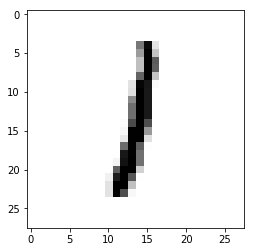

In [71]:
plt.imshow(mnist.train.images[4].reshape(28, 28), cmap = "Greys")

In [72]:
# This will reset the computation graph, if some variables are disallowed, run this once
tf.reset_default_graph()

In [73]:
def generator(z, reuse= None):
    # works like a module | see difference between scope and function
    # "reuse" allows to retain the values of variables inside scope on another call
    with tf.variable_scope("gen", reuse= reuse):
        # Leak factor
        alpha = 0.01
        
        # "units" is the number of nodes in the layer
        hidden1 = tf.layers.dense(inputs = z, units = 128)
        # leaky relu like
        hidden1 = tf.maximum(hidden1, alpha*hidden1)
        
        hidden2 = tf.layers.dense(inputs = hidden1, units = 128)
        hidden2 = tf.maximum(hidden2, alpha*hidden2)
        
        # "units" is 784 because (28*28) image. And generator generates an image 
        output = tf.layers.dense(inputs = hidden2, units = 784, activation = tf.nn.tanh)
        
        return output

In [74]:
def discriminator(X, reuse=None):
    #print(real_images.get_shape().as_list())
    with tf.variable_scope("dis", reuse= reuse):
        alpha = 0.01
           
        hidden1 = tf.layers.dense(inputs= X, units= 128)
        hidden1 = tf.maximum(hidden1, hidden1*alpha)
        
        hidden2 = tf.layers.dense(inputs= hidden1, units= 128)
        hidden2 = tf.maximum(hidden2, hidden2*alpha)
        
        logits = tf.layers.dense(inputs= hidden2, units= 1)
        output = tf.sigmoid(logits)
        
        return output, logits

In [75]:
real_images = tf.placeholder(tf.float32, shape= [None, 784])
z = tf.placeholder(tf.float32, shape= [None, 100])

In [76]:
G = generator(z)

In [77]:
D_output_real, D_logits_real = discriminator(real_images)

In [78]:
print(D_logits_real.get_shape().as_list())

[None, 1]


In [79]:
D_output_fake, D_logits_fake = discriminator(G, reuse= True)

In [80]:
def loss_func(logits_in, labels_in):
    cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logits_in, labels= labels_in))
    return cost

In [81]:
D_loss_real = loss_func(D_logits_real, tf.ones_like(D_logits_real))
D_loss_fake = loss_func(D_logits_fake, tf.zeros_like(D_logits_real))

In [82]:
D_loss = D_loss_real + D_loss_fake

In [83]:
G_loss = loss_func(D_logits_fake, tf.ones_like(D_logits_fake))

In [84]:
tvars = tf.trainable_variables()

d_vars = []
g_vars = []

for i in range(len(tvars)):
    if tvars[i].name[:3] == "gen":
        g_vars.append(tvars[i])
    else:
        d_vars.append(tvars[i])

In [85]:
learning_rate = 0.001 

In [86]:
D_trainer = tf.train.AdamOptimizer(learning_rate).minimize(D_loss, var_list = d_vars)

In [87]:
G_trainer = tf.train.AdamOptimizer(learning_rate).minimize(G_loss, var_list = g_vars)

In [109]:
epochs = 500
batch_size = 100

In [110]:
init = tf.global_variables_initializer()

In [111]:
samples = []

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(epochs):
        num_batches = int(mnist.train.num_examples/batch_size)
        
        for i in range(num_batches):
            batch = mnist.train.next_batch(batch_size)
            batch_images = batch[0].reshape((batch_size, 784))
            batch_images = batch_images*2-1
            
            batch_z = np.random.uniform(-1, 1, size= (batch_size, 100))
            
            _ = sess.run(D_trainer, feed_dict={real_images:batch_images, z: batch_z})
            _ = sess.run(G_trainer, feed_dict={z: batch_z})
            
        print("epoch ", epoch , " completed.")
        sample_z = np.random.uniform(-1, 1, size= (1, 100))
        gen_sample = sess.run(generator(z, reuse=True), feed_dict= {z:sample_z})
        
        samples.append(gen_sample)

epoch  0  completed.
epoch  1  completed.
epoch  2  completed.
epoch  3  completed.
epoch  4  completed.
epoch  5  completed.
epoch  6  completed.
epoch  7  completed.
epoch  8  completed.
epoch  9  completed.
epoch  10  completed.
epoch  11  completed.
epoch  12  completed.
epoch  13  completed.
epoch  14  completed.
epoch  15  completed.
epoch  16  completed.
epoch  17  completed.
epoch  18  completed.
epoch  19  completed.
epoch  20  completed.
epoch  21  completed.
epoch  22  completed.
epoch  23  completed.
epoch  24  completed.
epoch  25  completed.
epoch  26  completed.
epoch  27  completed.
epoch  28  completed.
epoch  29  completed.
epoch  30  completed.
epoch  31  completed.
epoch  32  completed.
epoch  33  completed.
epoch  34  completed.
epoch  35  completed.
epoch  36  completed.
epoch  37  completed.
epoch  38  completed.
epoch  39  completed.
epoch  40  completed.
epoch  41  completed.
epoch  42  completed.
epoch  43  completed.
epoch  44  completed.
epoch  45  completed

epoch  361  completed.
epoch  362  completed.
epoch  363  completed.
epoch  364  completed.
epoch  365  completed.
epoch  366  completed.
epoch  367  completed.
epoch  368  completed.
epoch  369  completed.
epoch  370  completed.
epoch  371  completed.
epoch  372  completed.
epoch  373  completed.
epoch  374  completed.
epoch  375  completed.
epoch  376  completed.
epoch  377  completed.
epoch  378  completed.
epoch  379  completed.
epoch  380  completed.
epoch  381  completed.
epoch  382  completed.
epoch  383  completed.
epoch  384  completed.
epoch  385  completed.
epoch  386  completed.
epoch  387  completed.
epoch  388  completed.
epoch  389  completed.
epoch  390  completed.
epoch  391  completed.
epoch  392  completed.
epoch  393  completed.
epoch  394  completed.
epoch  395  completed.
epoch  396  completed.
epoch  397  completed.
epoch  398  completed.
epoch  399  completed.
epoch  400  completed.
epoch  401  completed.
epoch  402  completed.
epoch  403  completed.
epoch  404 

/home/aayush/.local/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


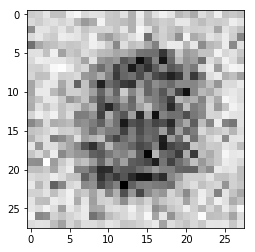

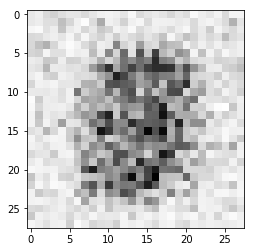

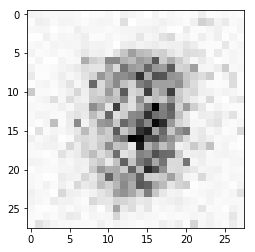

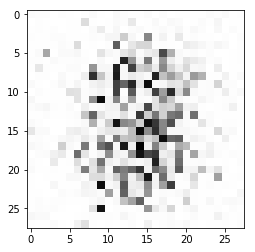

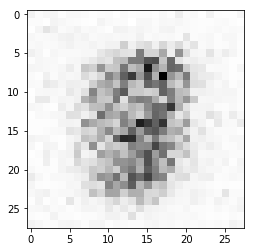

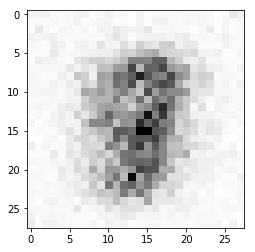

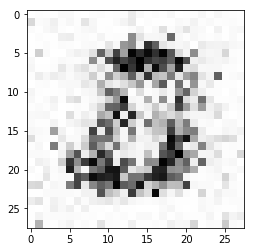

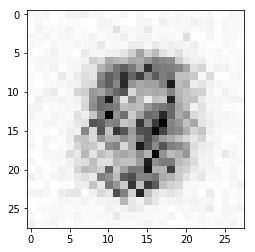

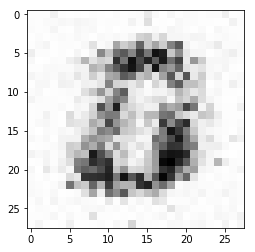

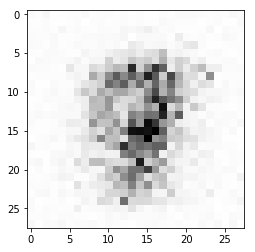

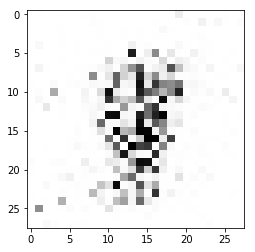

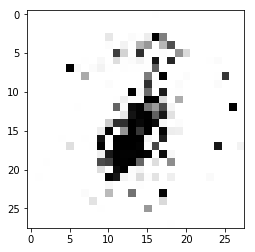

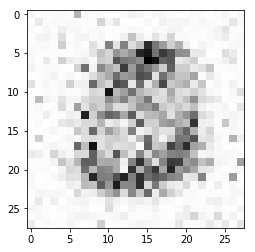

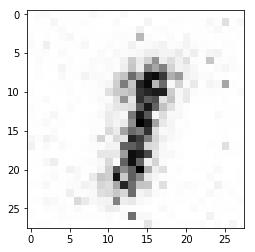

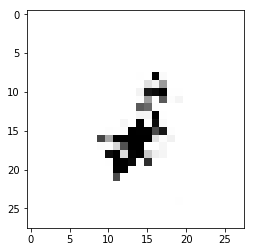

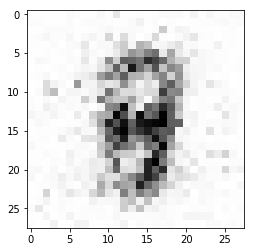

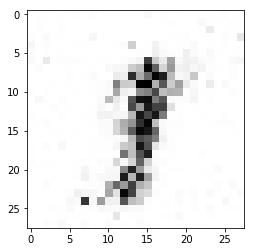

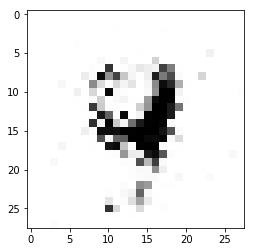

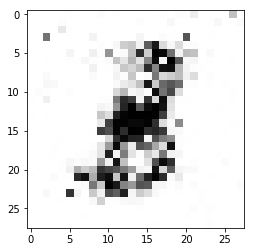

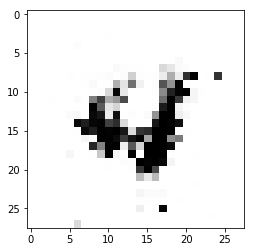

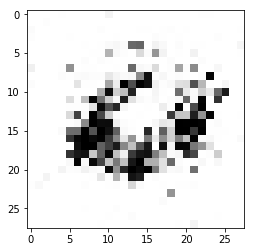

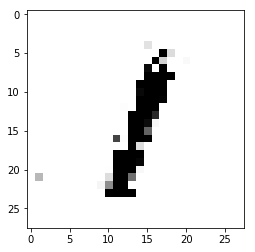

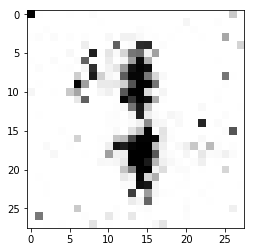

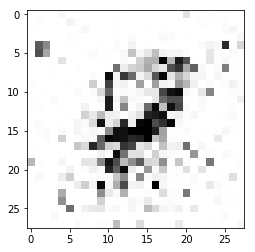

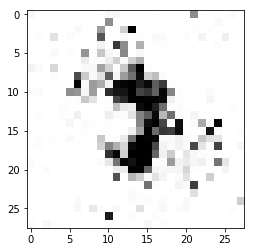

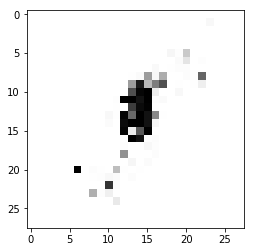

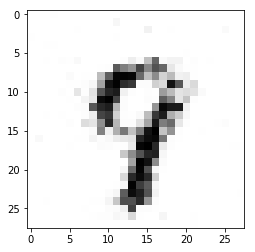

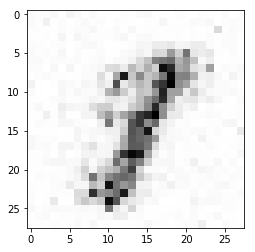

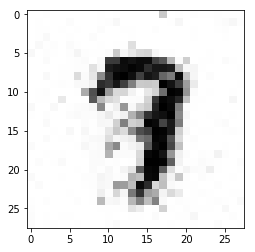

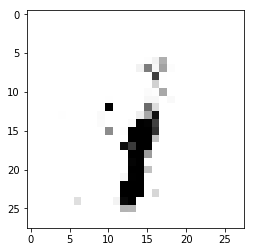

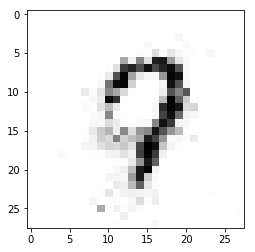

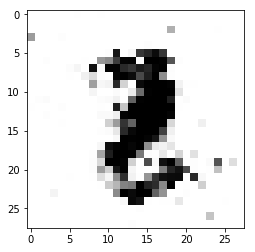

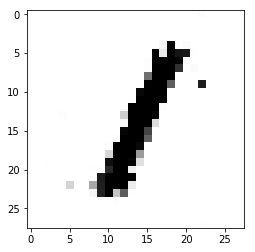

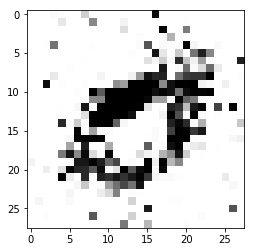

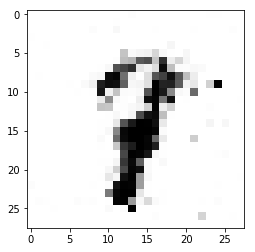

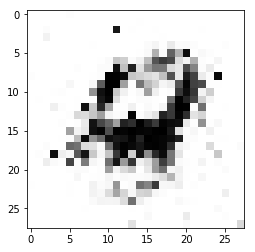

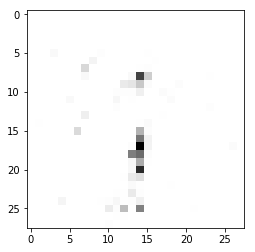

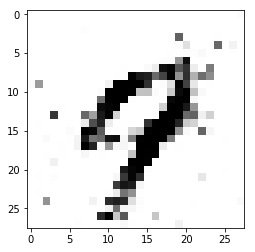

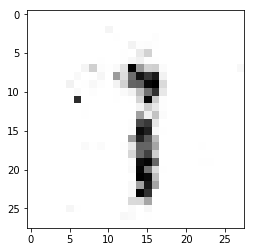

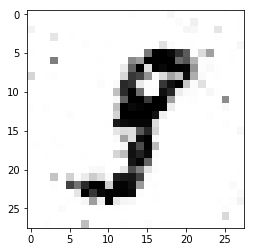

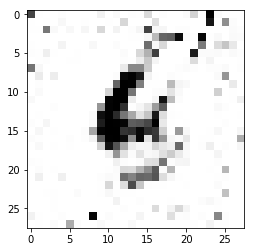

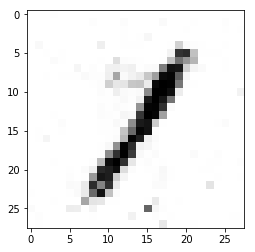

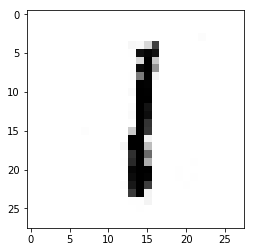

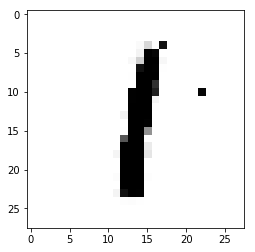

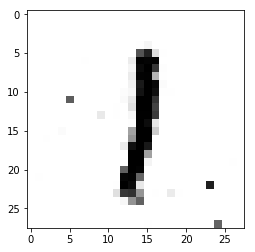

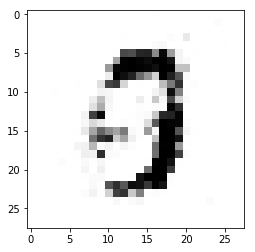

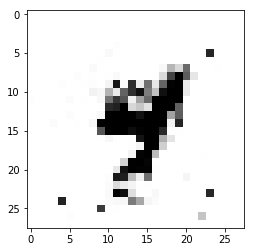

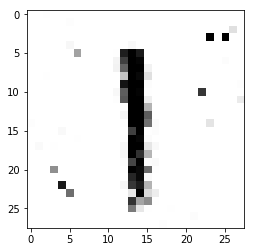

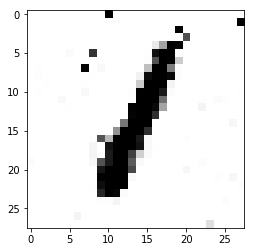

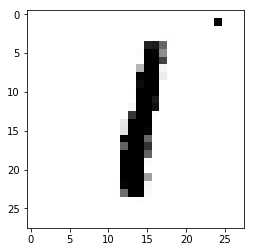

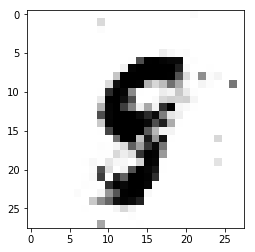

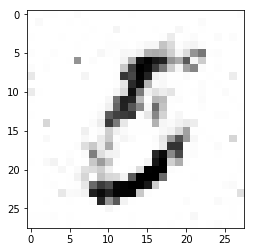

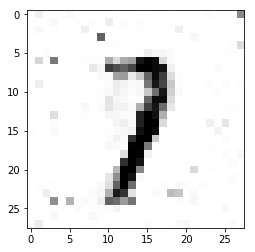

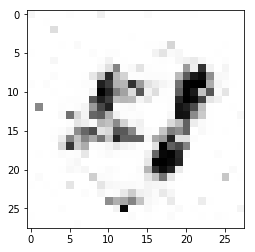

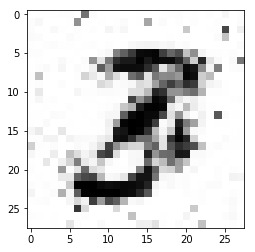

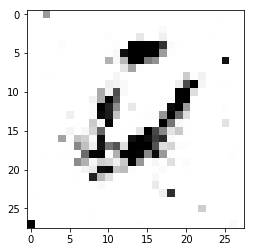

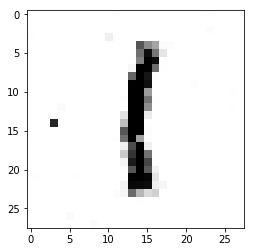

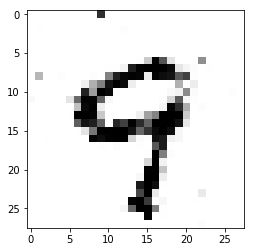

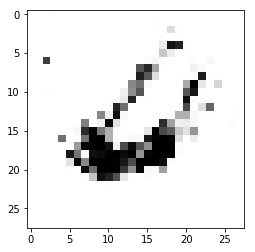

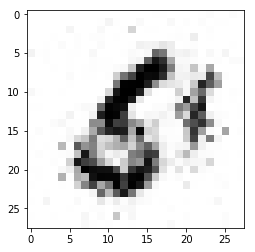

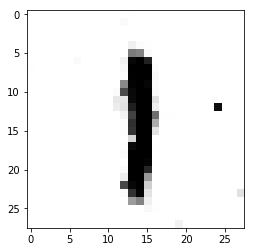

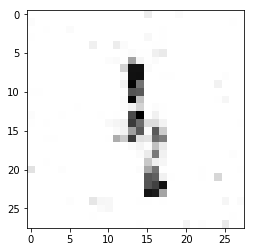

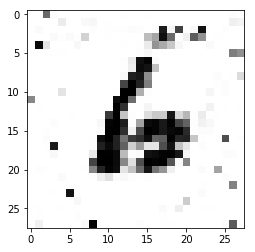

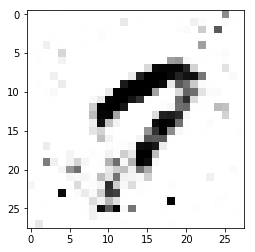

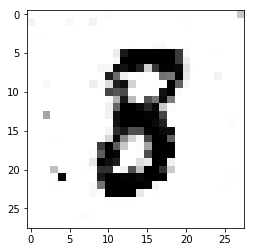

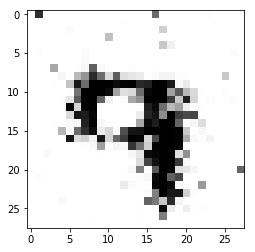

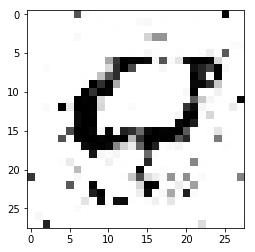

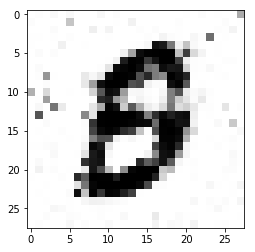

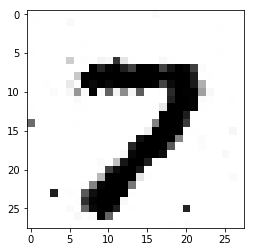

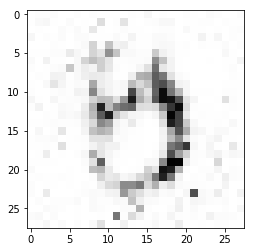

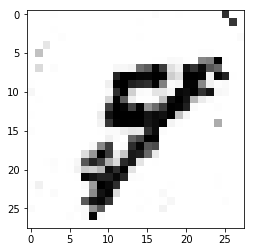

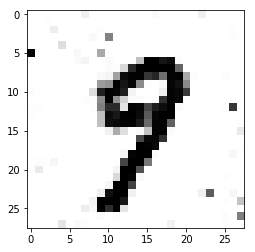

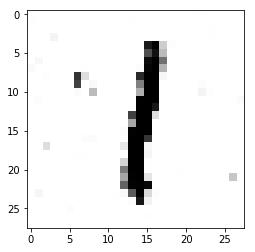

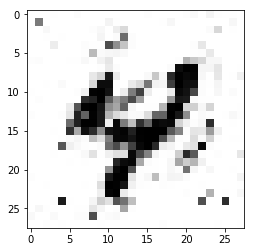

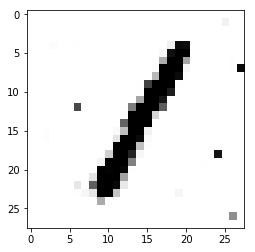

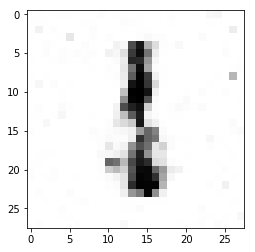

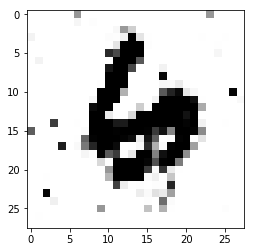

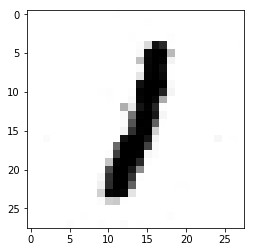

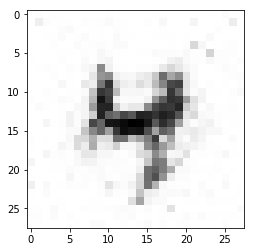

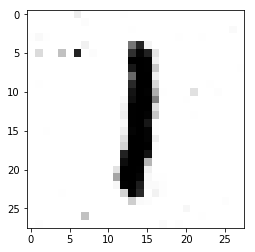

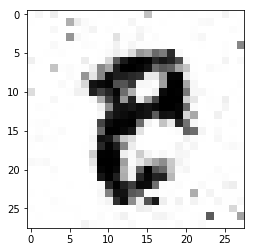

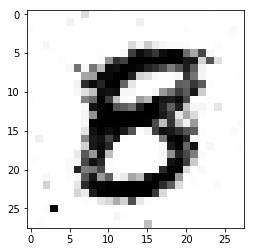

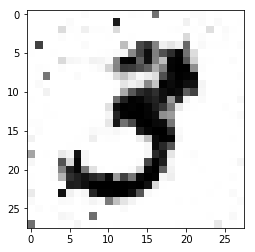

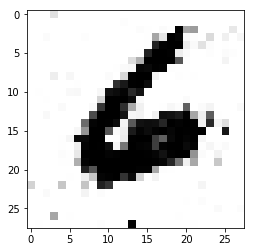

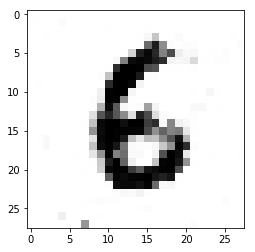

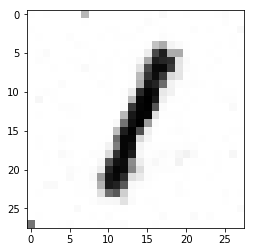

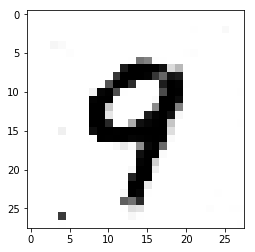

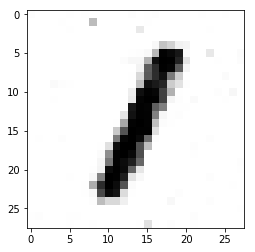

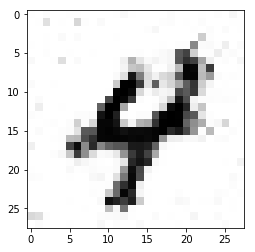

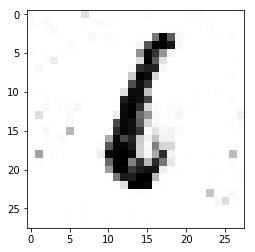

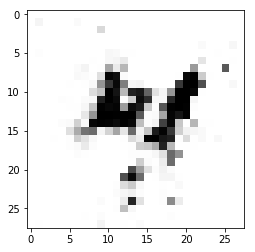

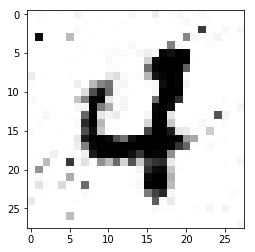

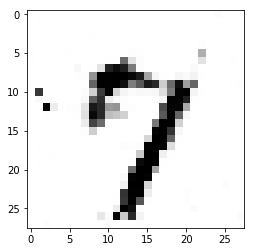

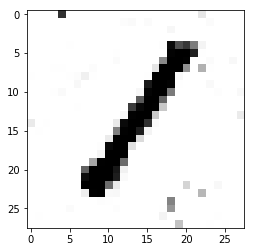

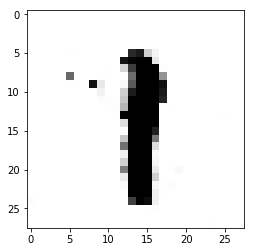

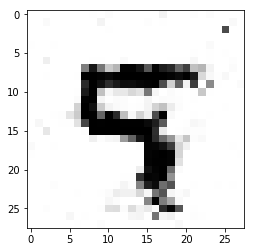

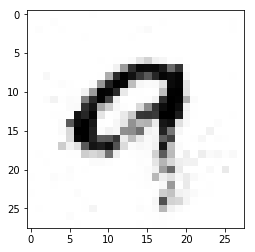

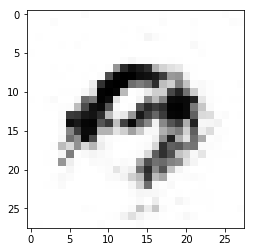

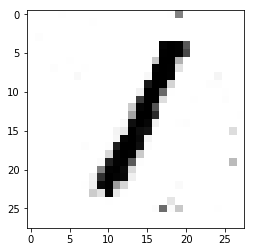

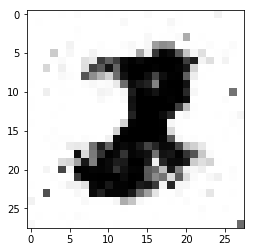

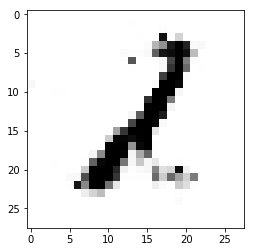

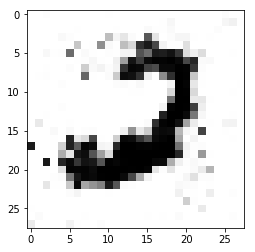

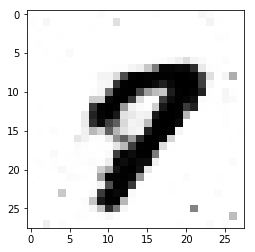

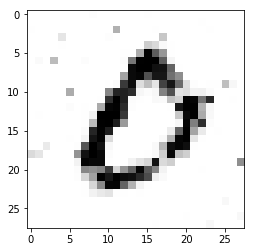

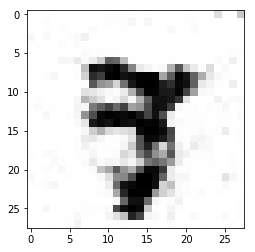

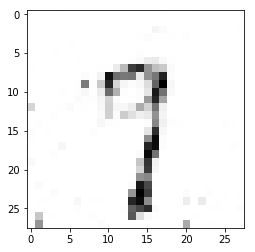

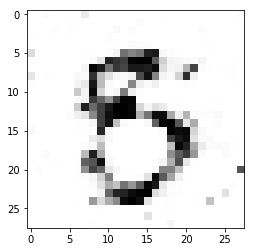

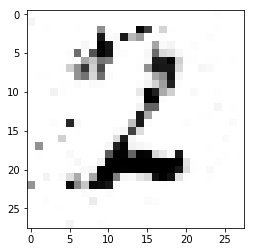

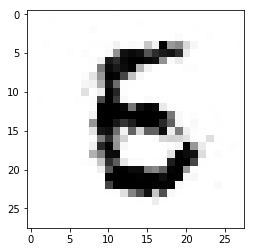

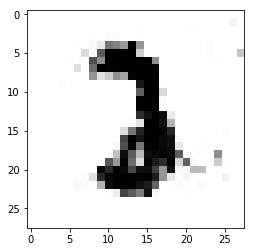

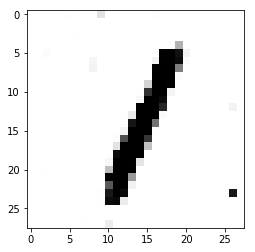

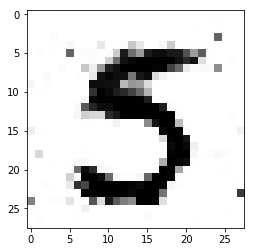

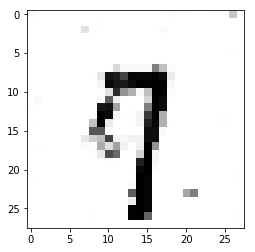

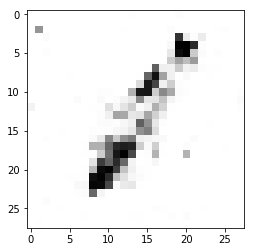

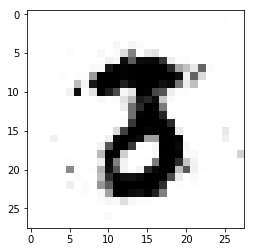

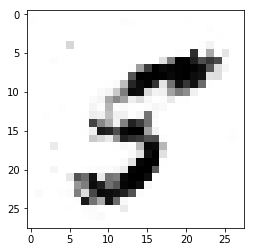

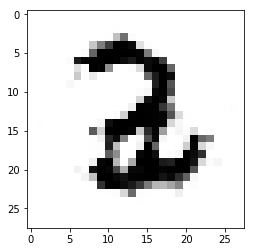

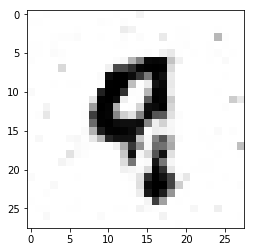

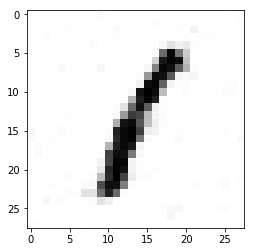

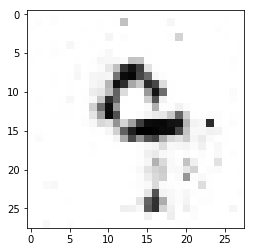

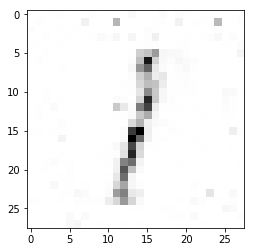

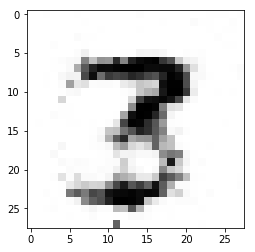

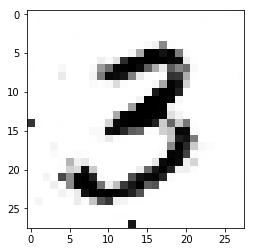

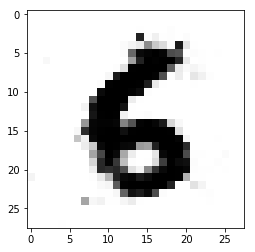

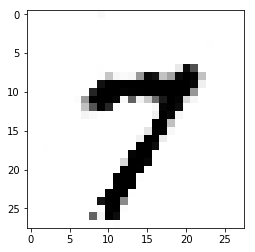

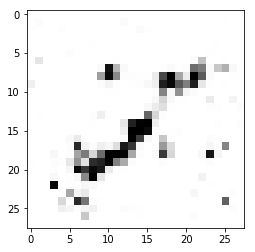

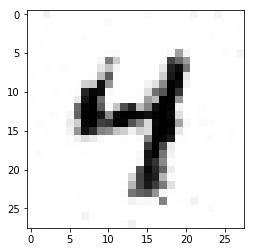

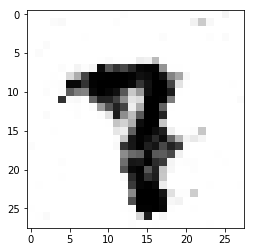

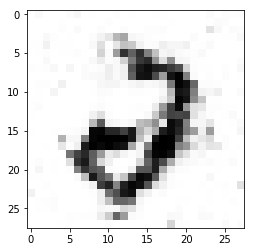

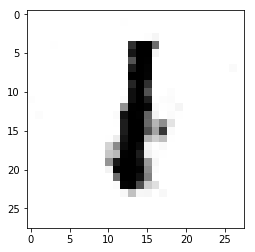

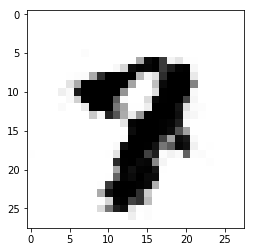

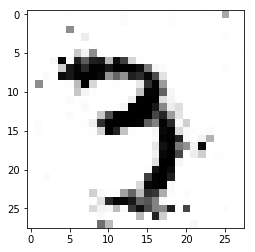

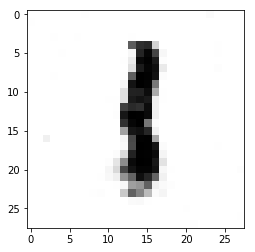

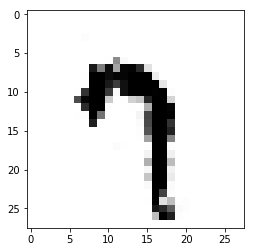

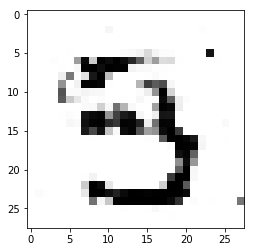

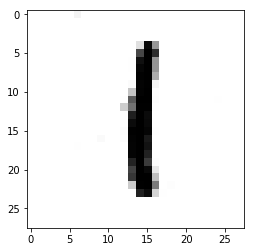

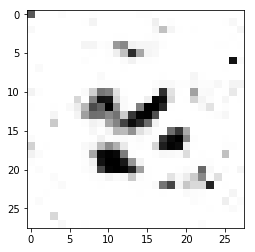

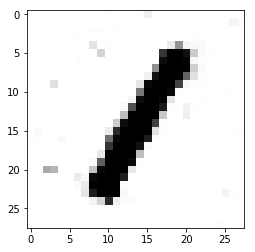

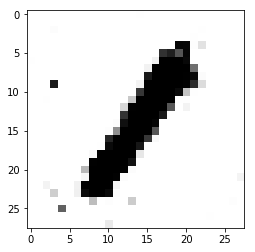

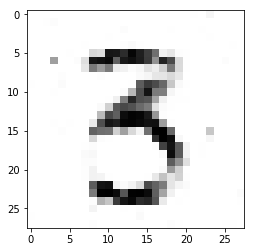

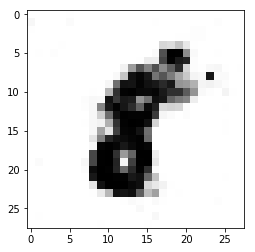

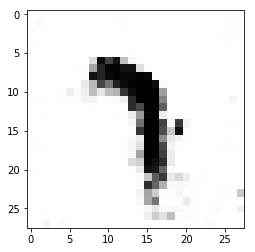

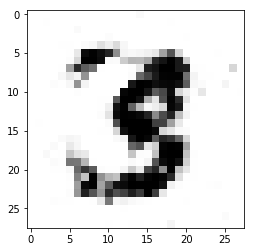

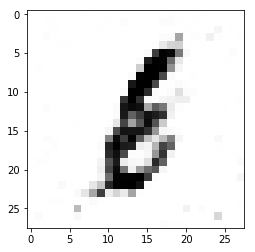

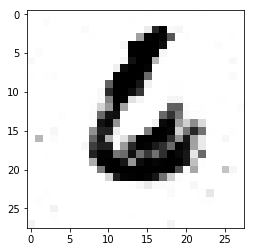

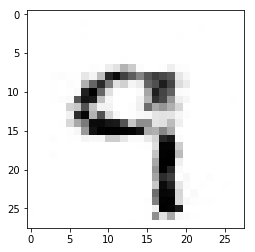

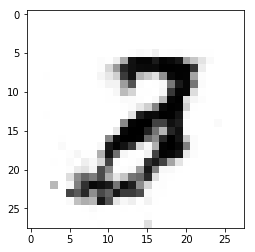

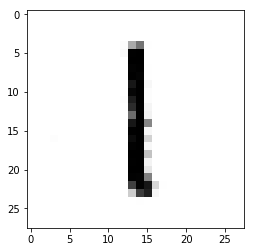

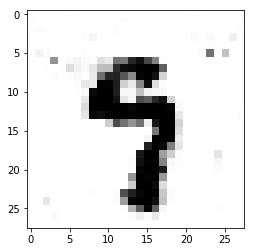

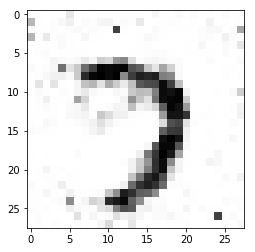

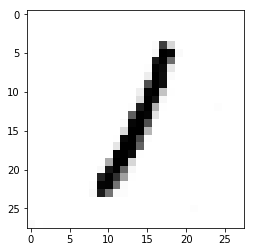

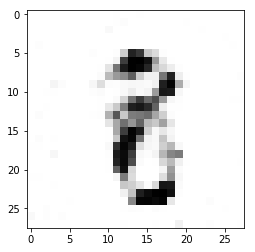

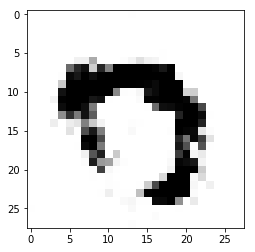

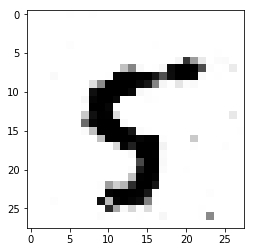

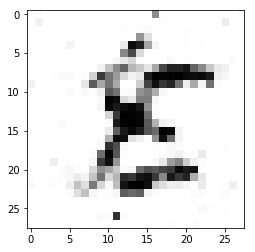

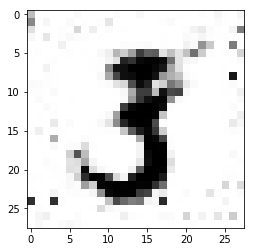

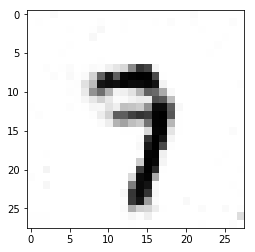

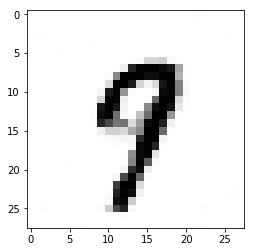

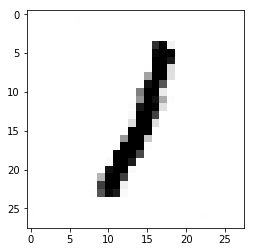

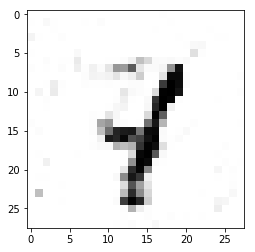

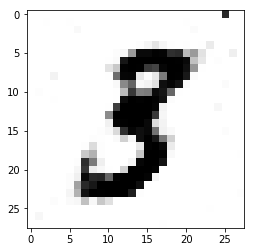

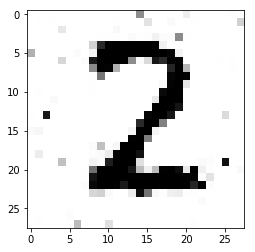

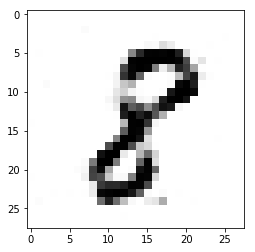

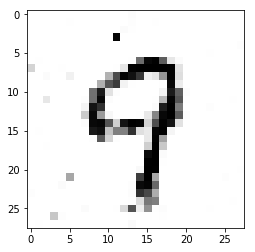

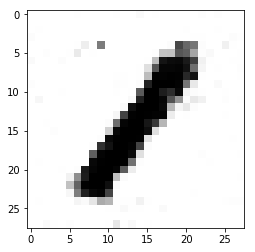

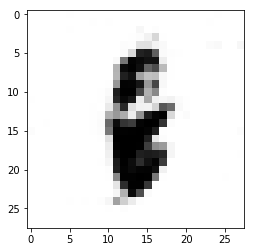

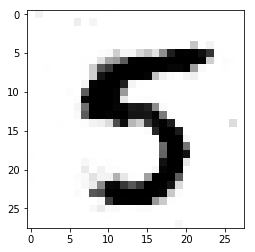

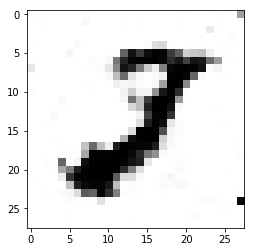

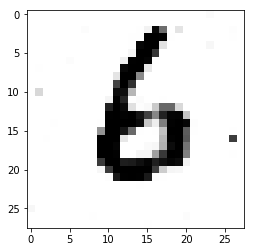

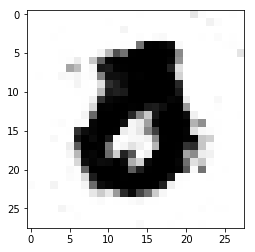

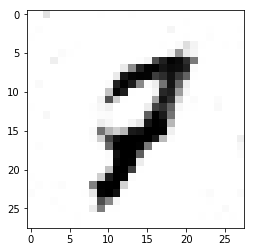

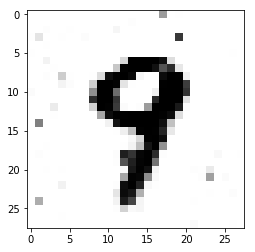

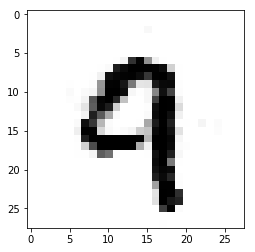

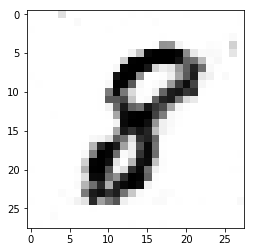

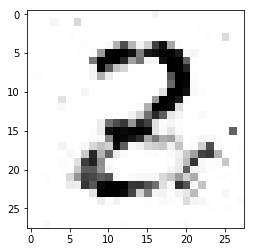

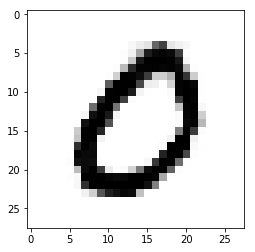

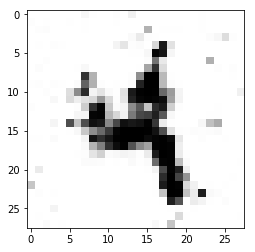

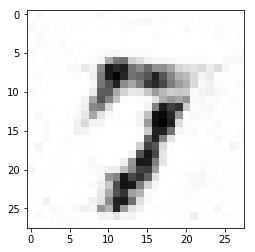

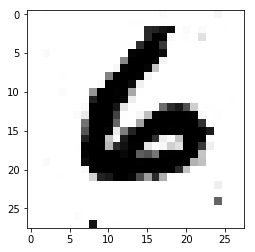

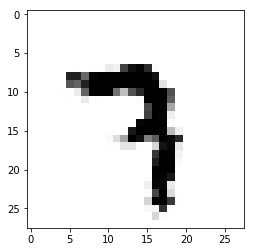

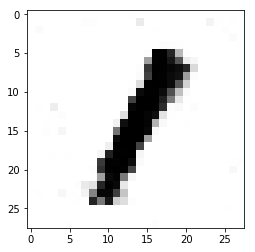

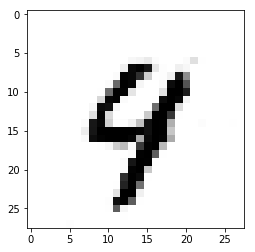

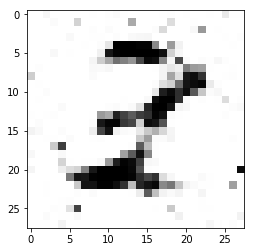

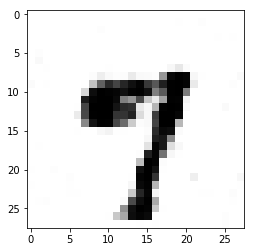

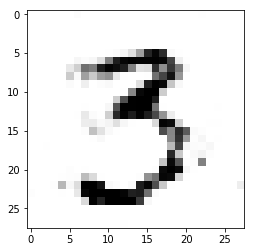

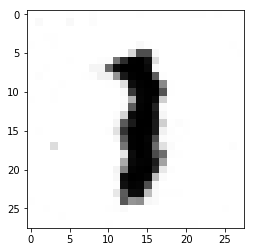

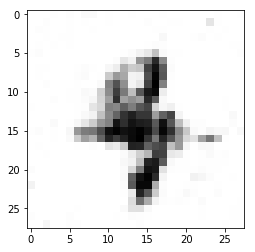

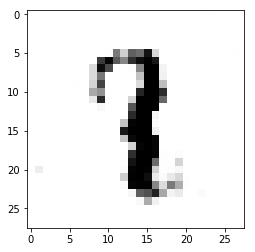

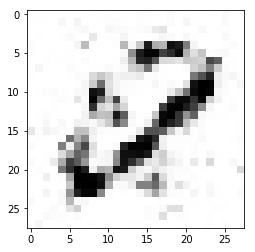

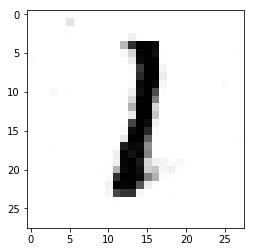

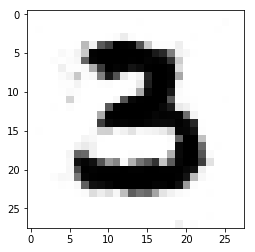

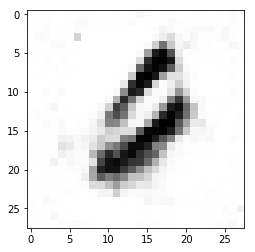

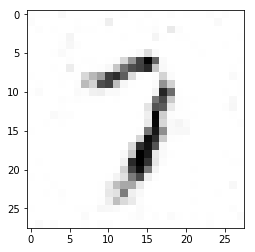

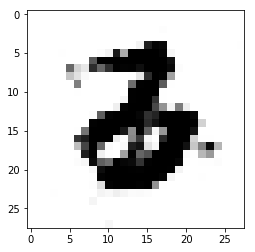

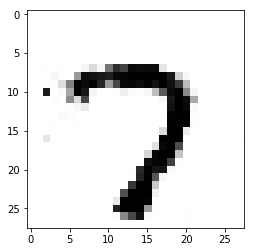

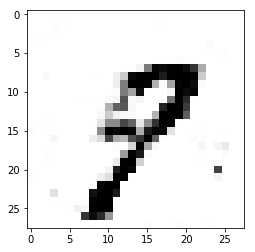

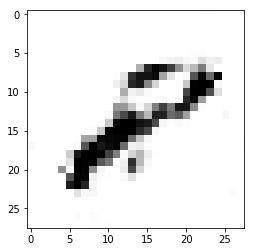

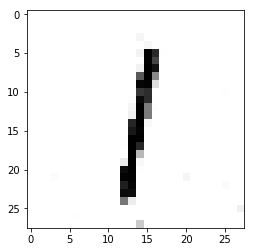

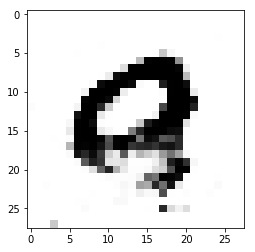

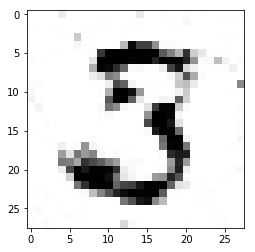

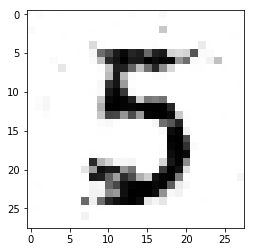

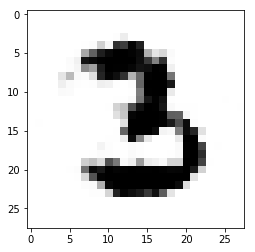

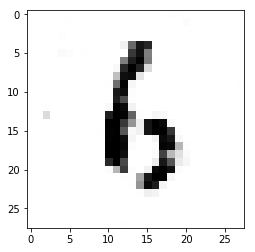

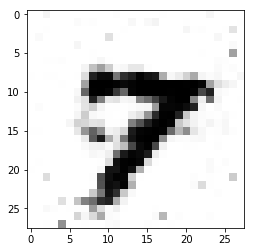

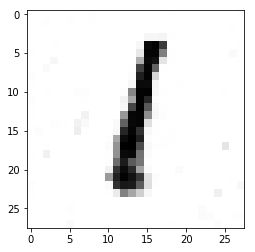

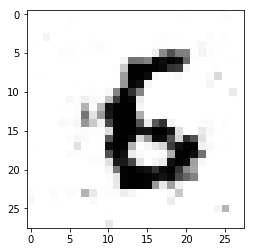

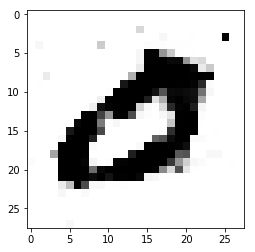

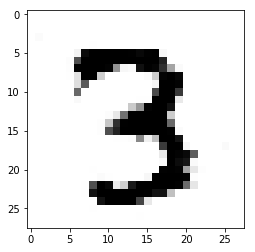

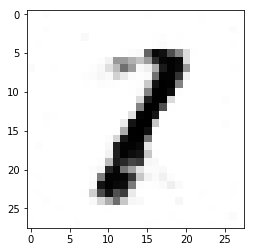

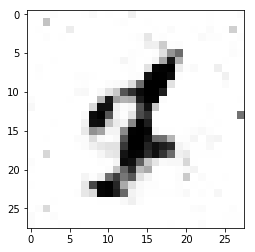

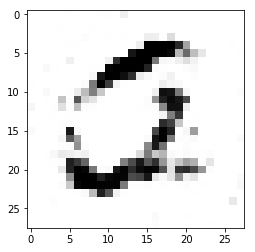

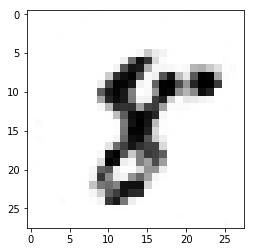

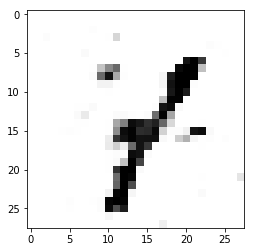

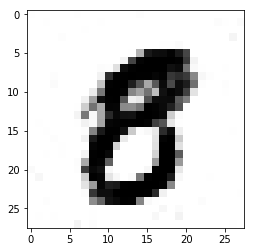

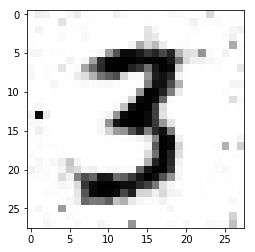

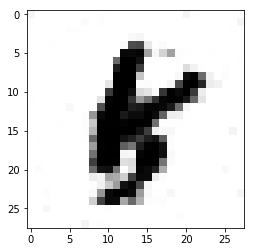

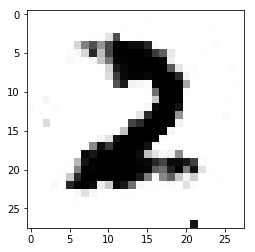

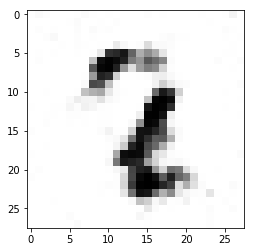

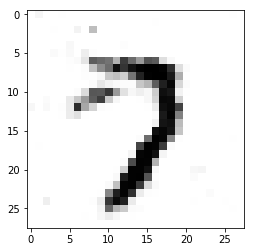

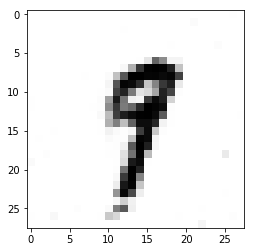

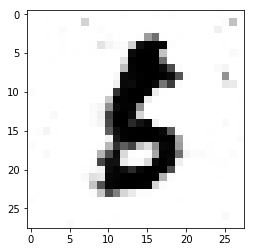

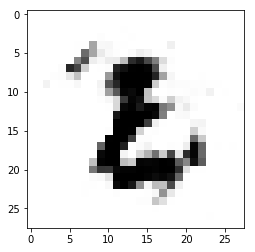

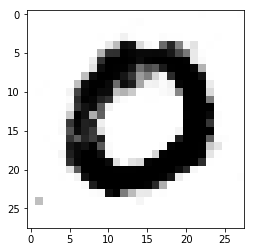

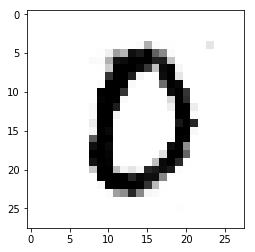

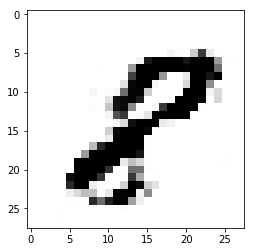

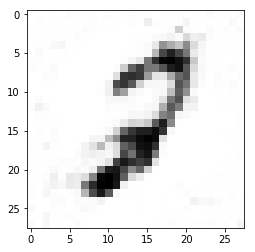

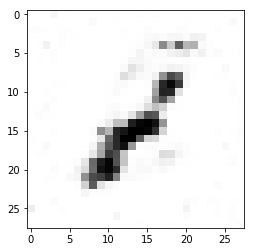

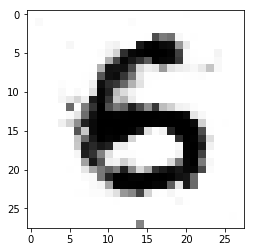

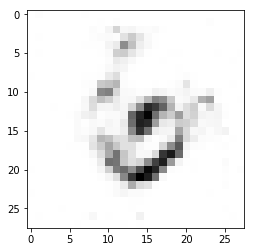

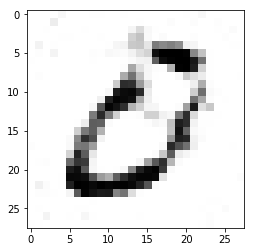

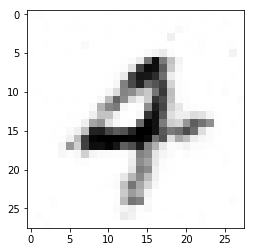

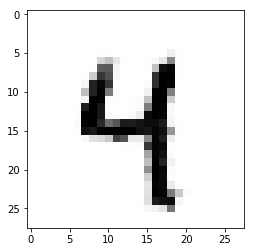

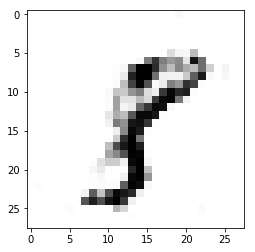

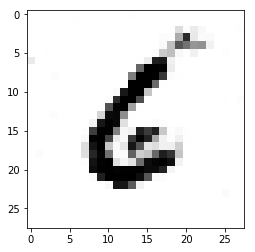

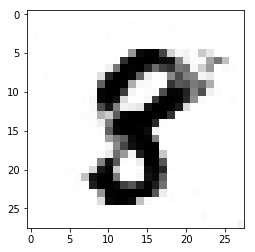

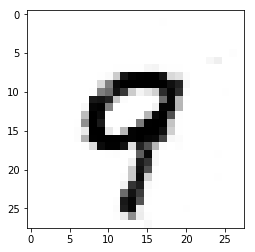

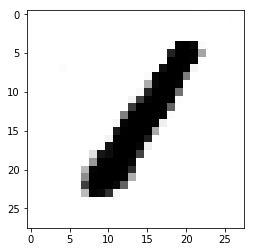

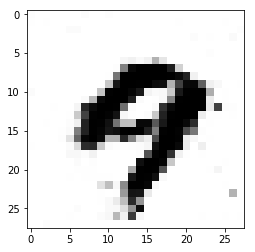

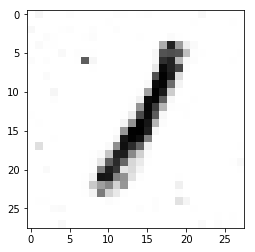

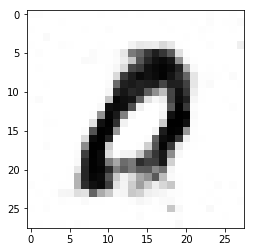

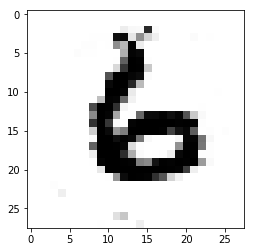

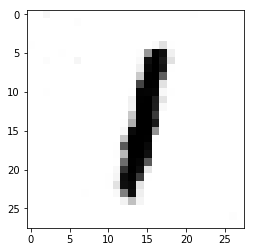

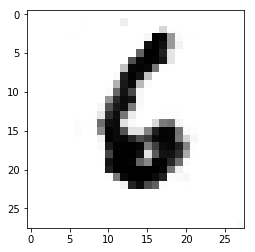

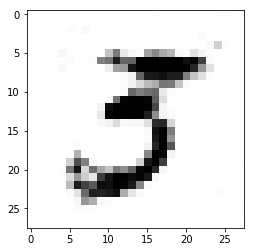

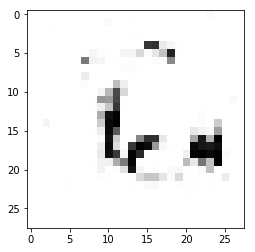

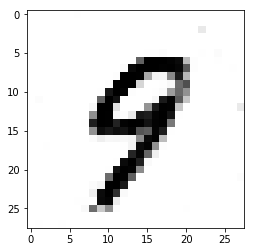

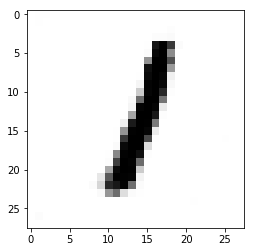

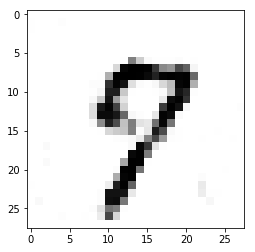

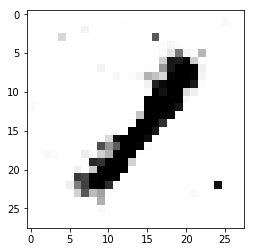

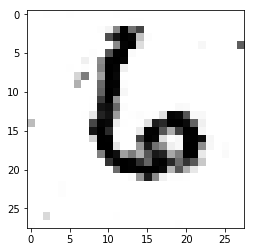

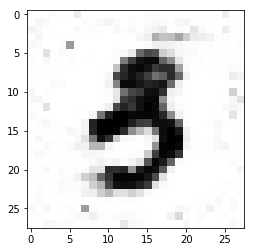

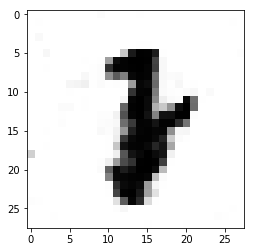

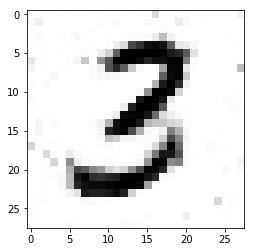

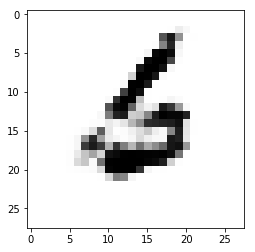

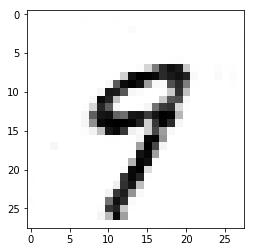

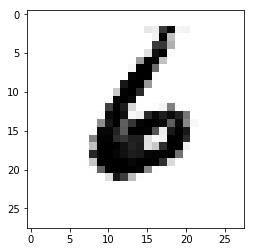

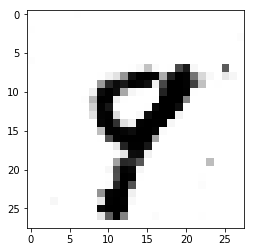

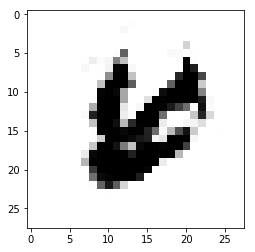

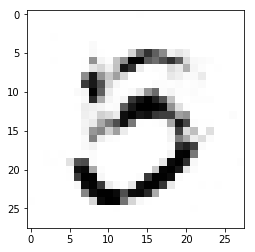

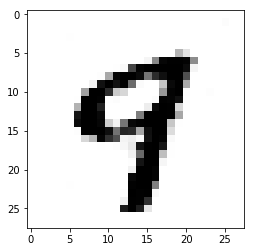

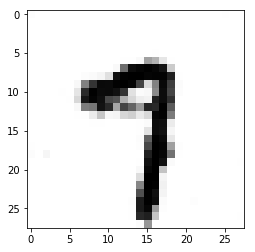

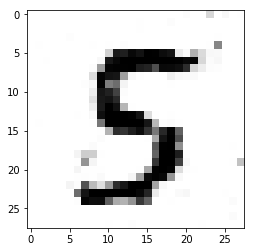

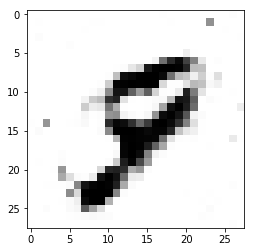

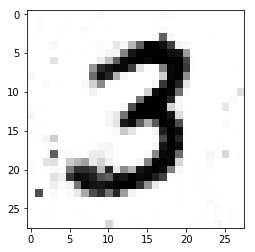

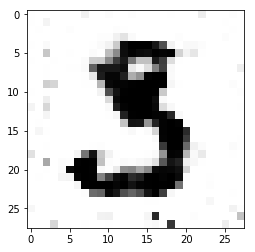

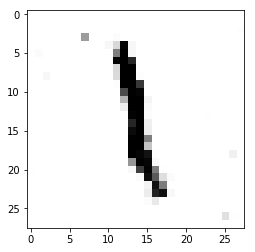

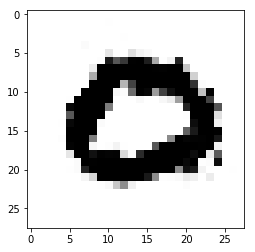

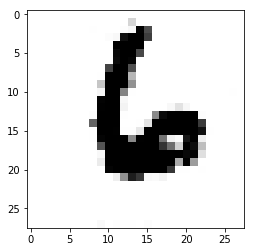

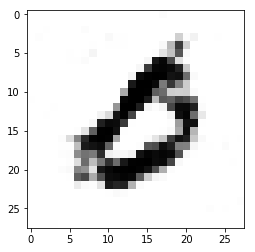

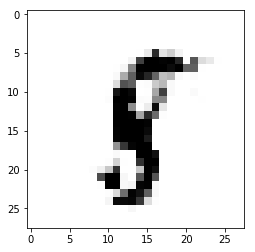

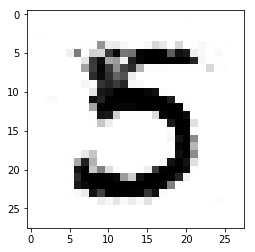

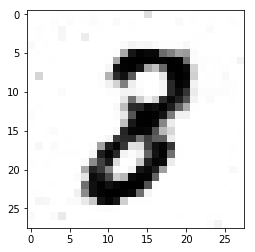

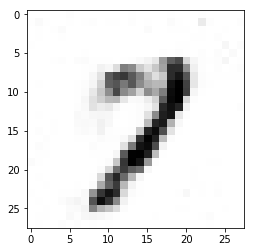

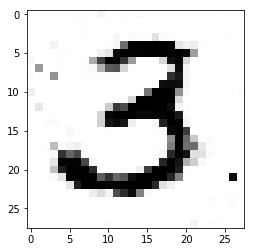

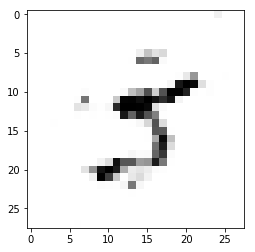

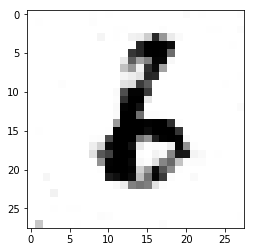

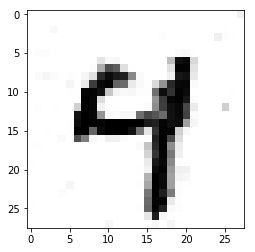

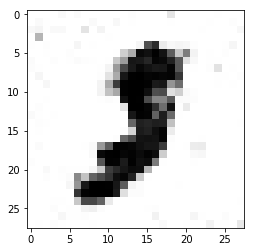

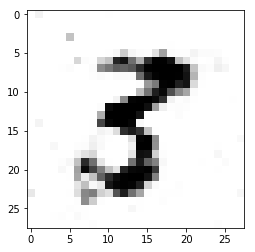

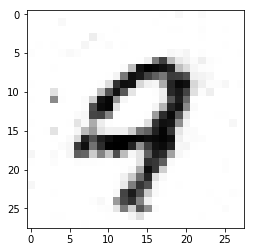

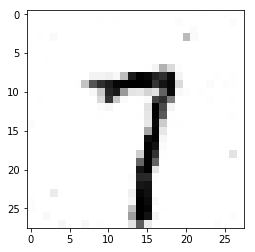

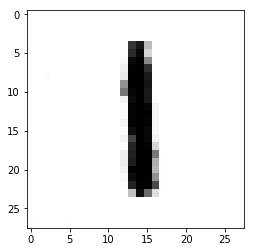

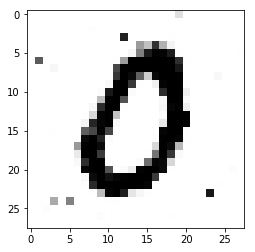

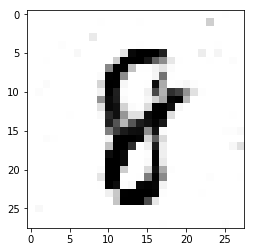

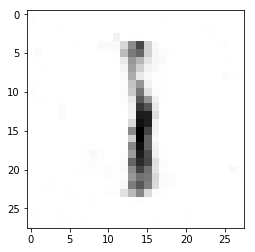

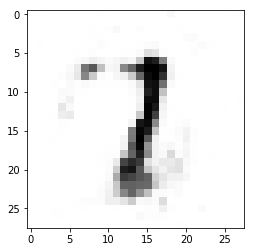

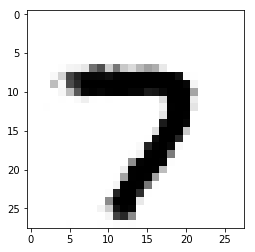

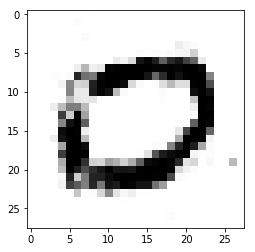

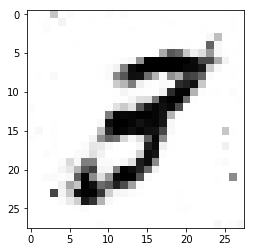

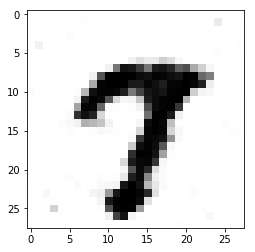

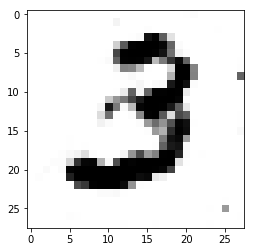

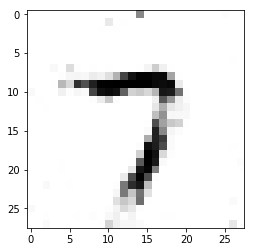

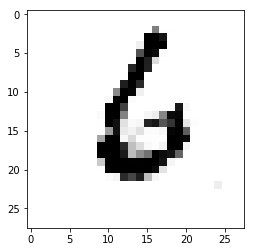

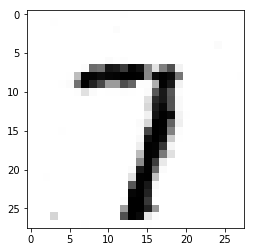

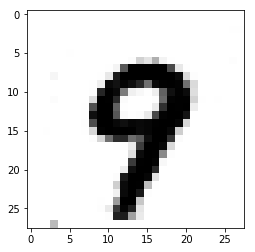

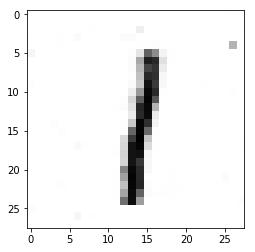

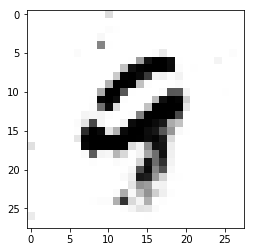

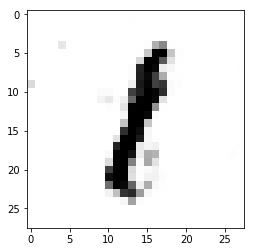

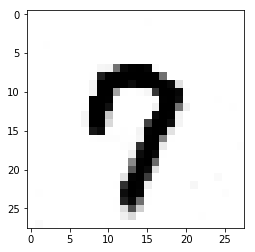

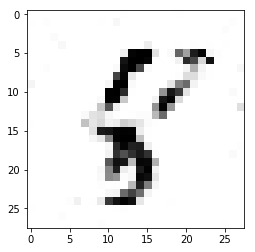

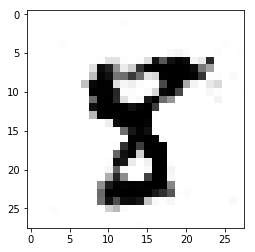

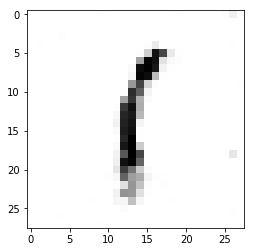

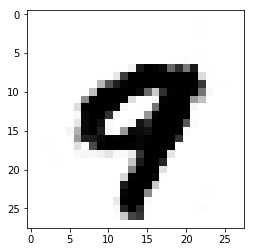

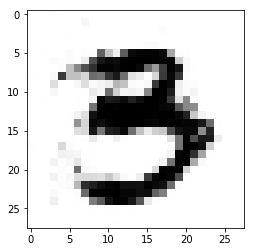

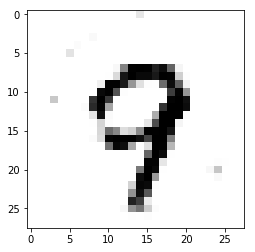

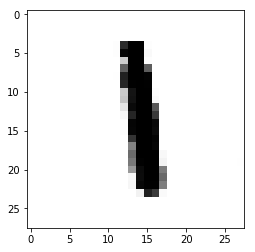

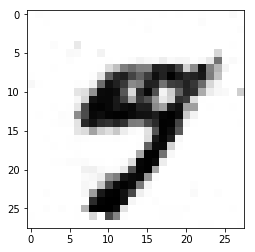

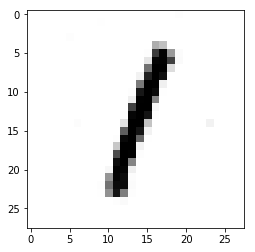

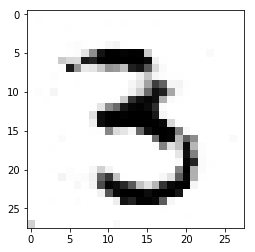

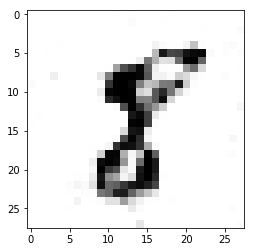

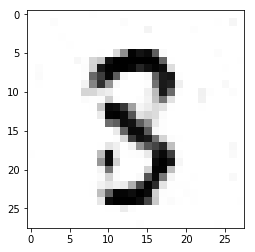

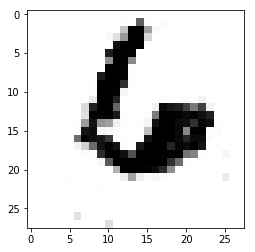

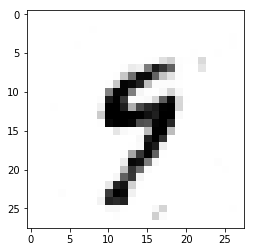

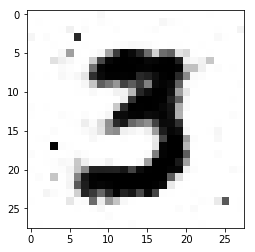

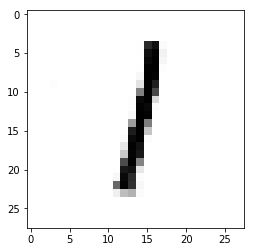

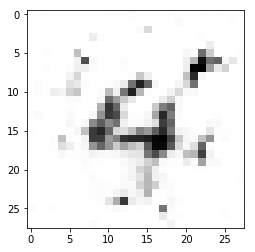

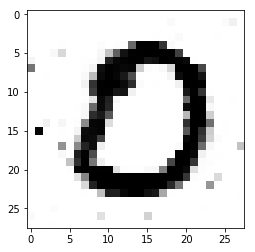

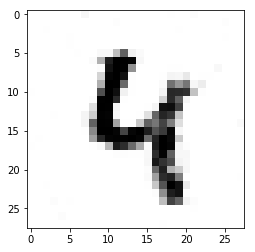

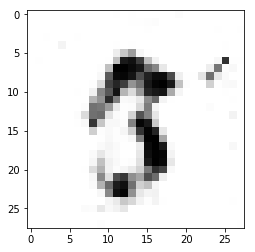

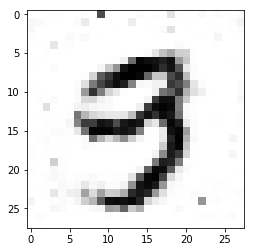

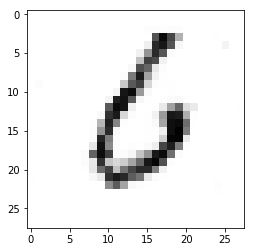

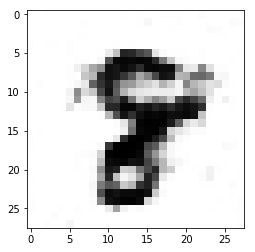

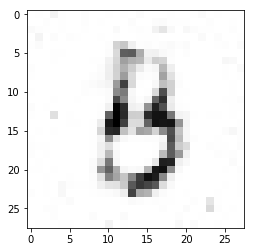

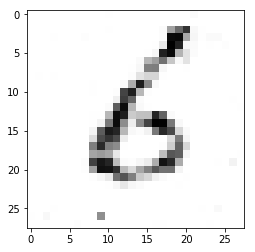

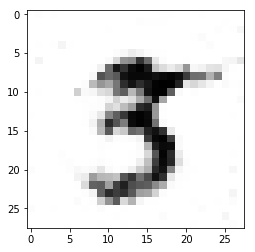

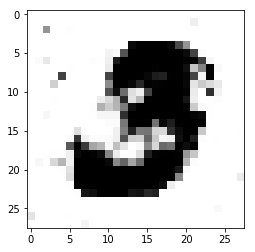

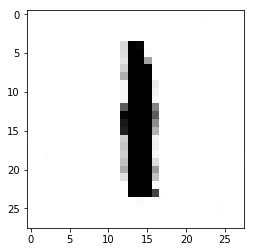

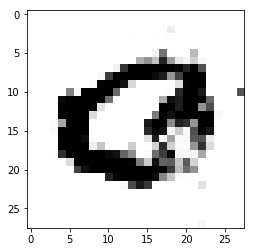

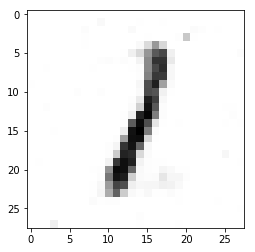

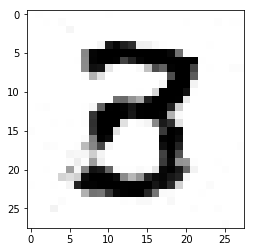

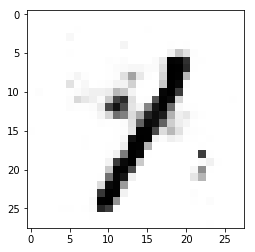

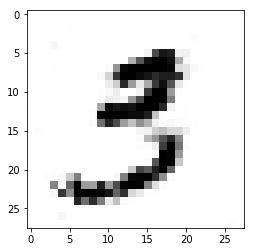

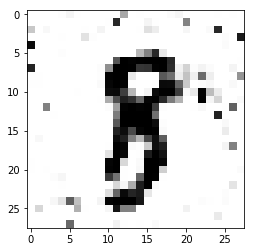

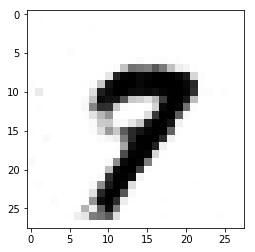

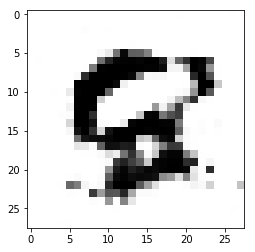

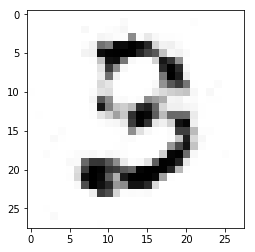

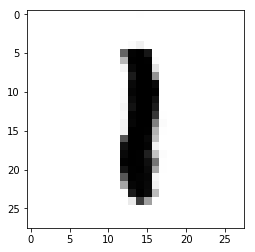

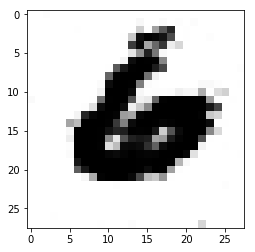

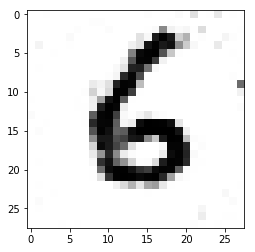

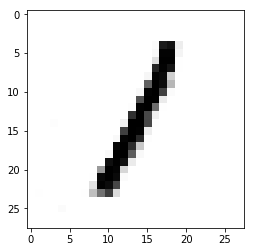

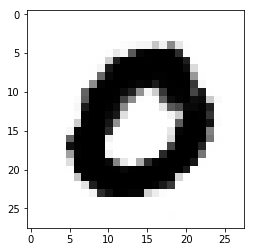

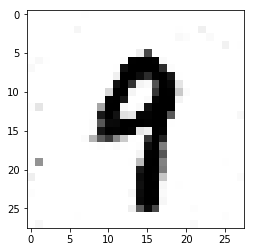

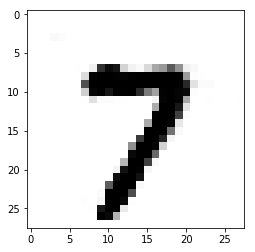

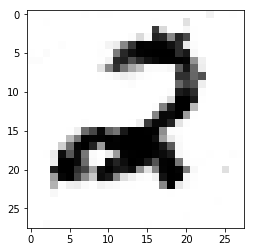

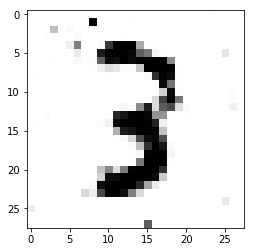

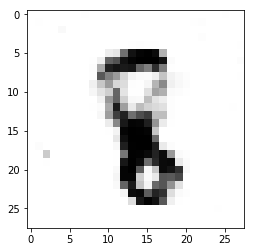

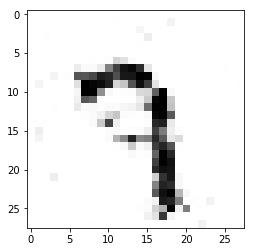

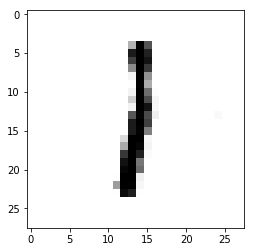

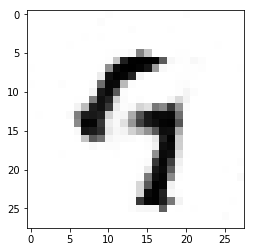

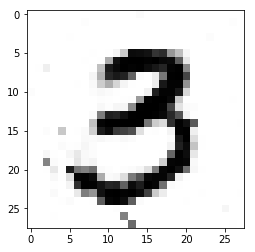

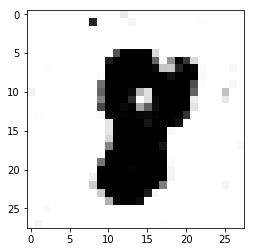

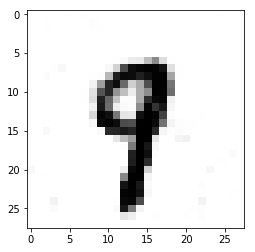

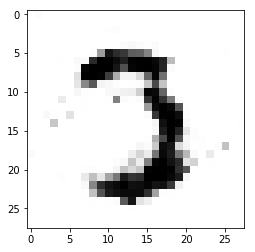

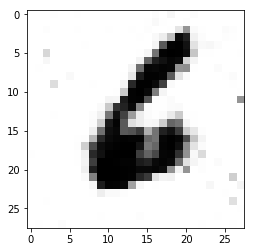

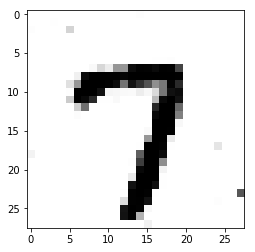

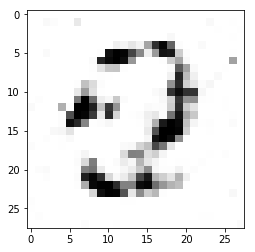

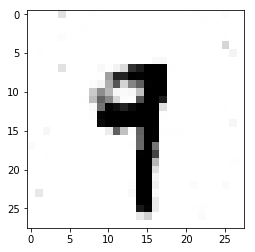

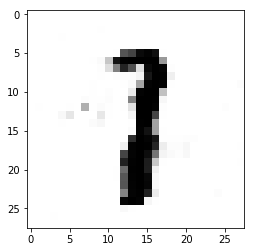

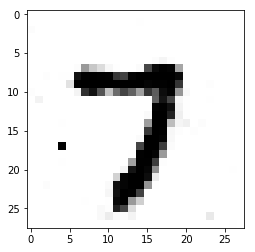

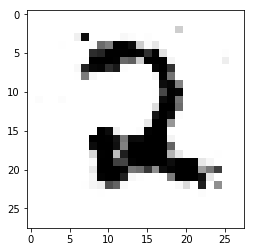

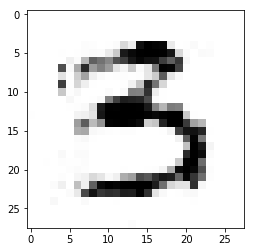

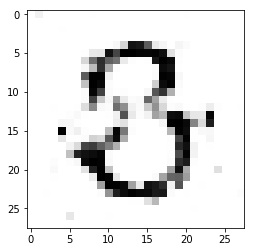

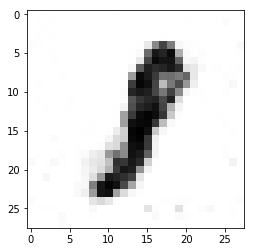

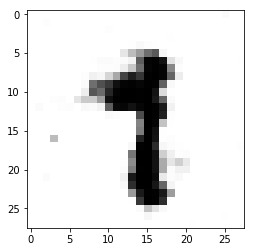

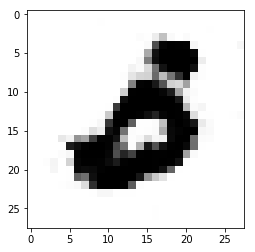

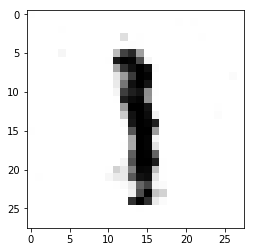

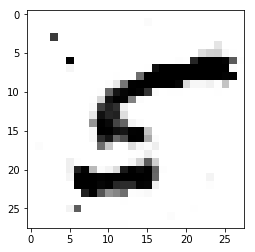

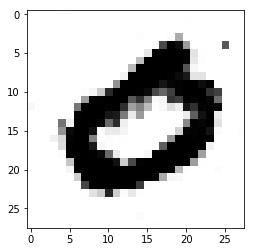

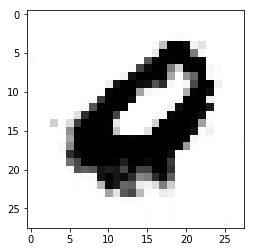

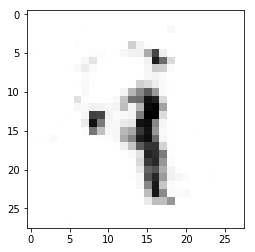

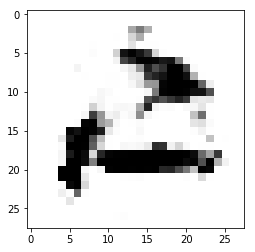

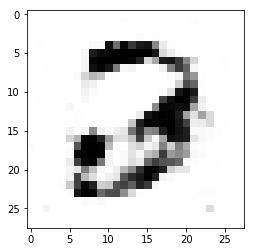

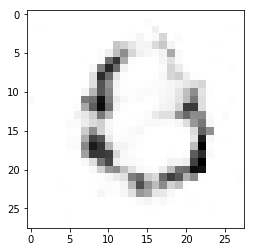

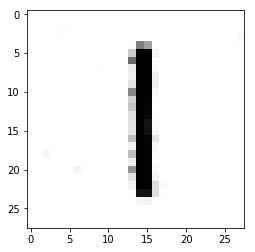

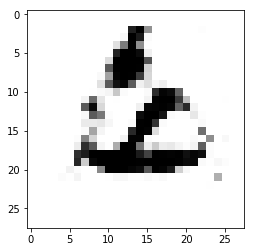

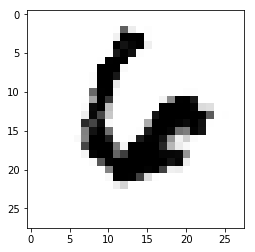

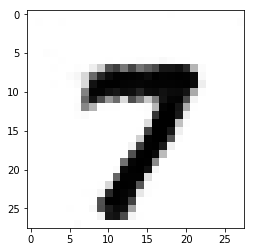

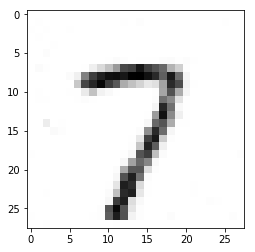

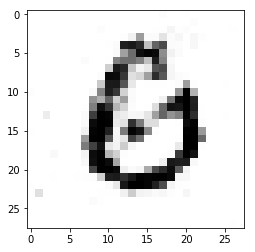

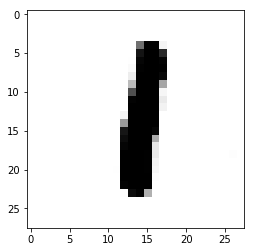

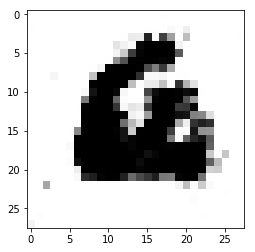

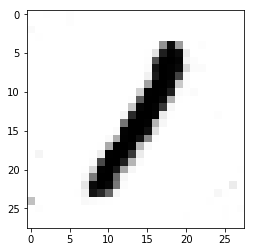

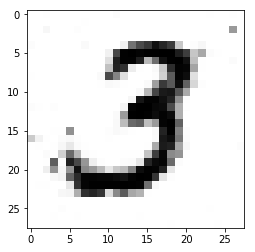

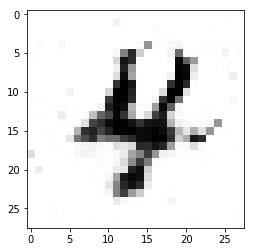

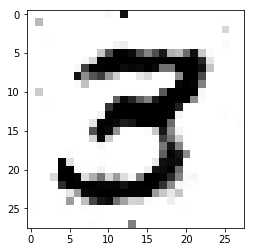

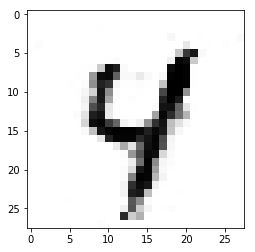

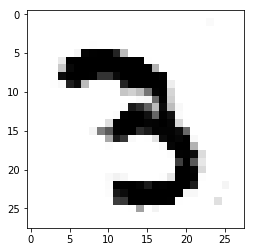

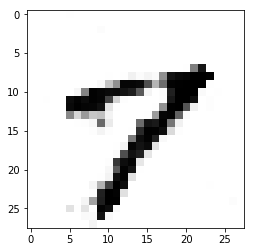

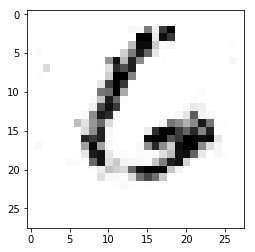

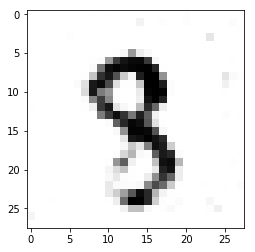

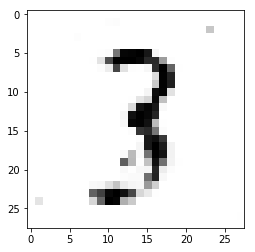

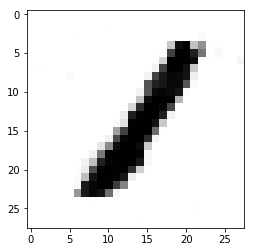

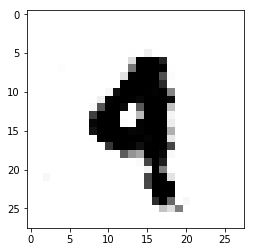

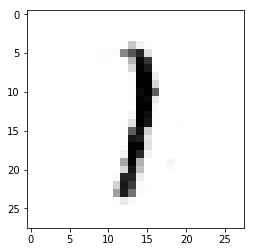

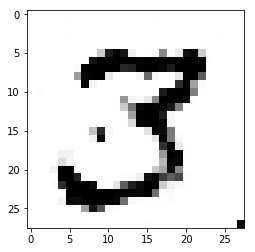

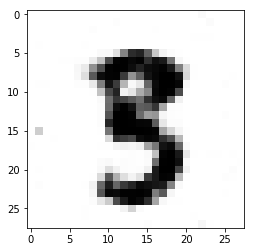

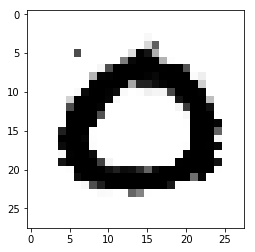

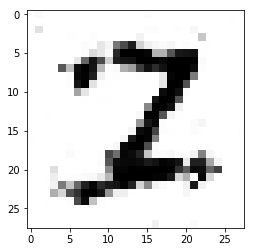

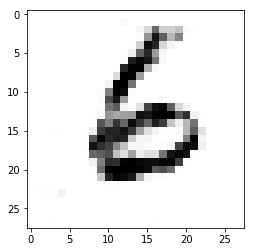

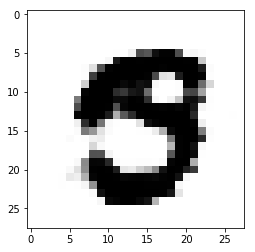

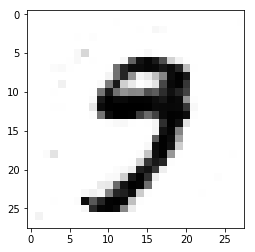

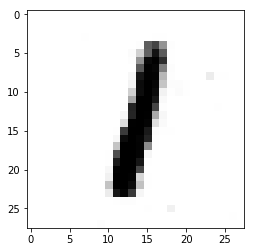

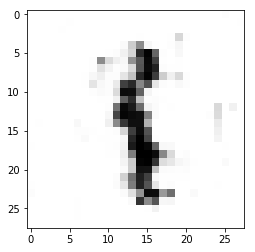

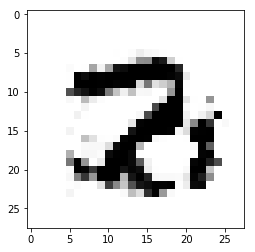

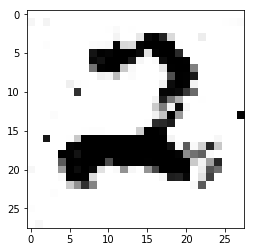

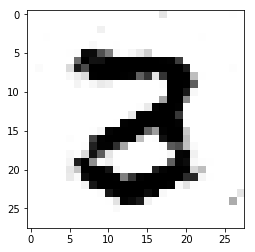

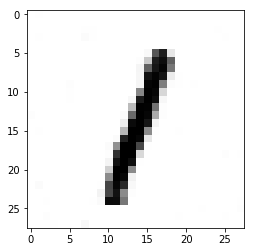

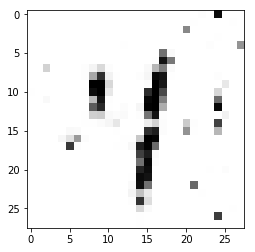

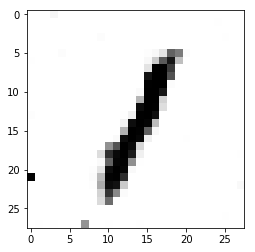

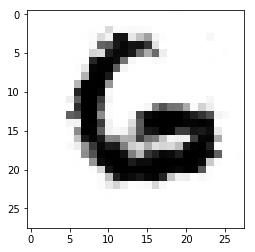

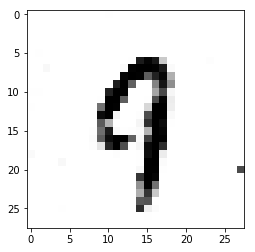

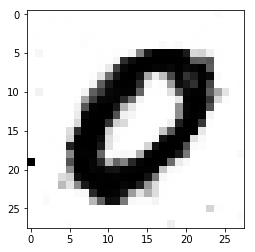

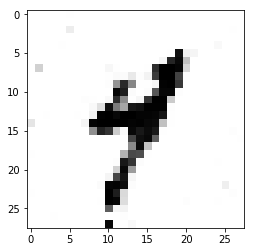

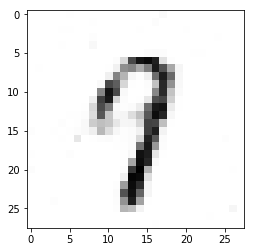

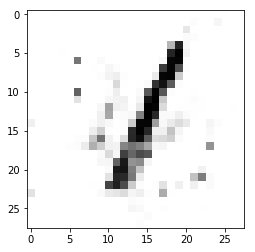

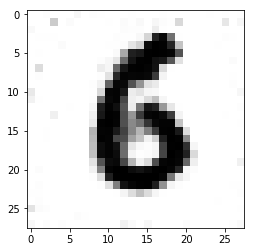

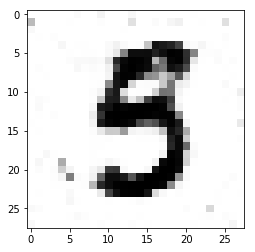

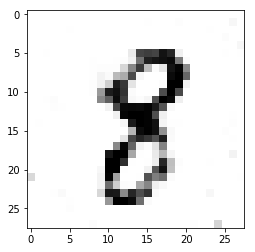

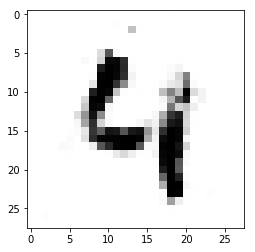

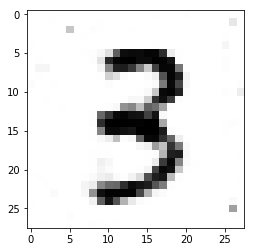

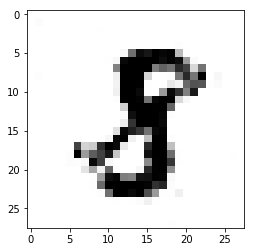

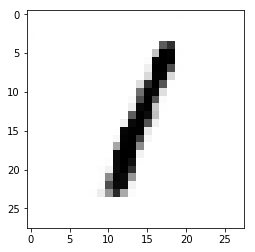

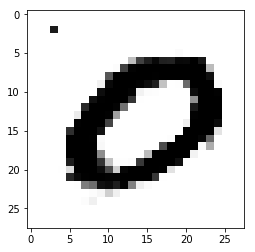

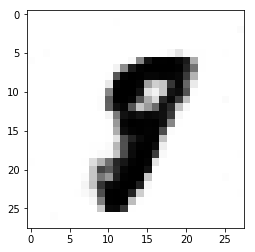

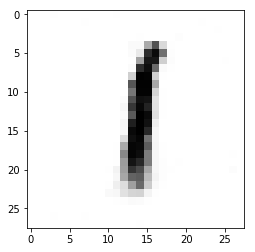

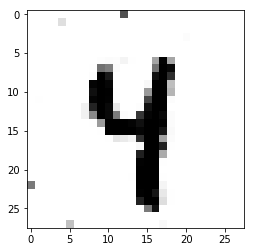

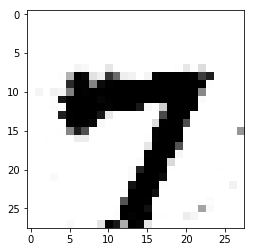

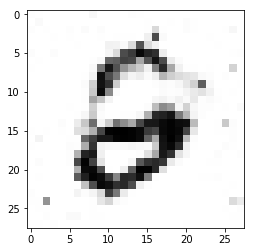

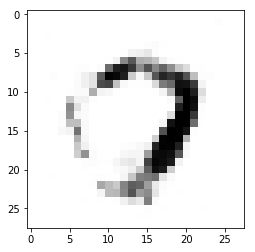

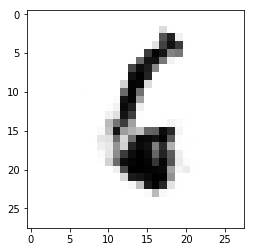

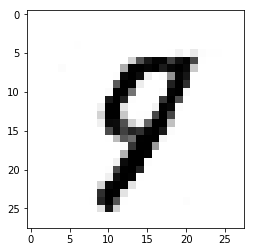

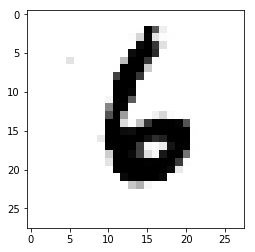

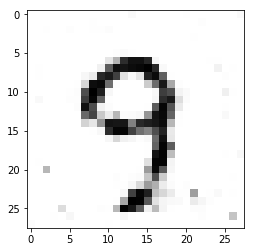

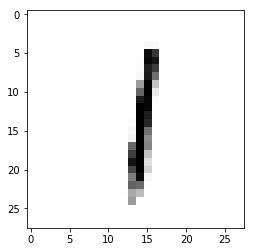

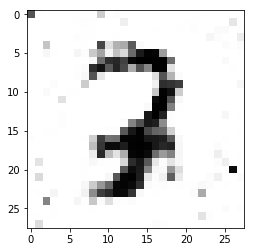

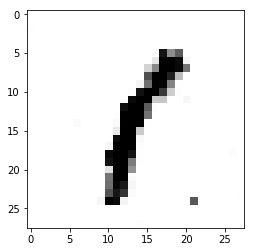

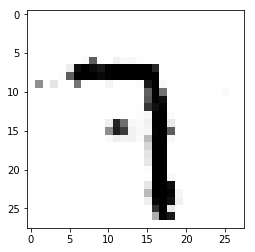

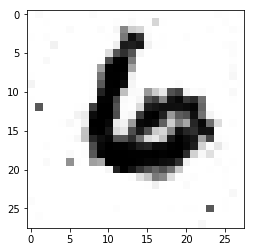

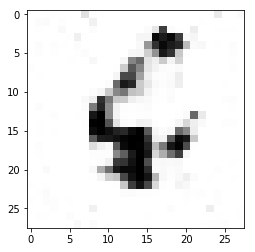

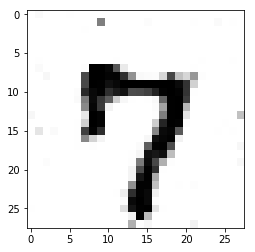

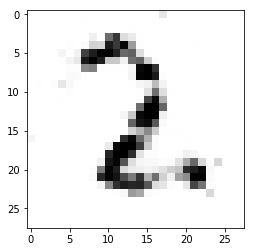

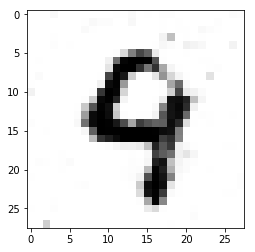

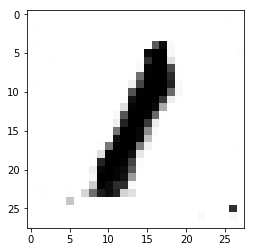

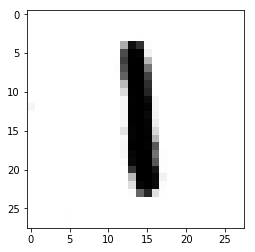

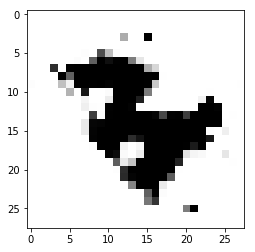

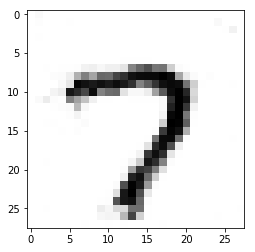

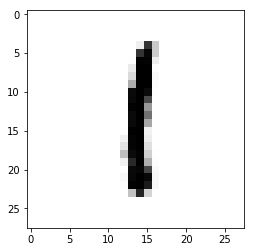

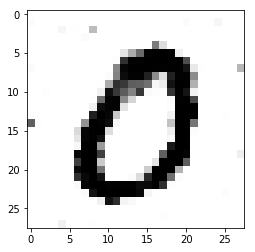

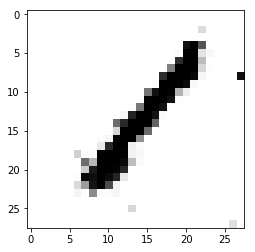

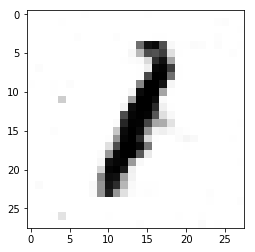

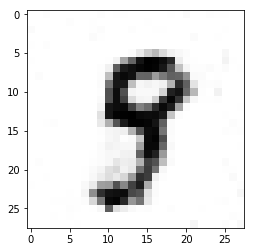

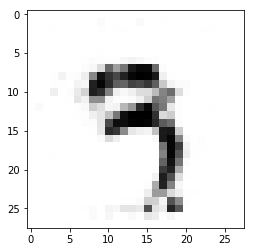

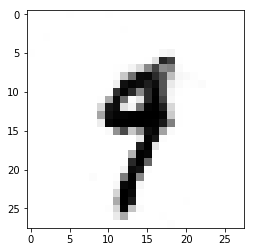

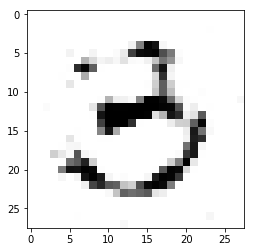

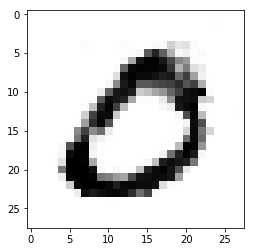

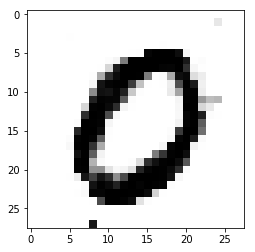

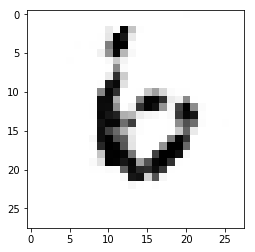

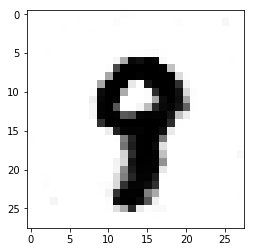

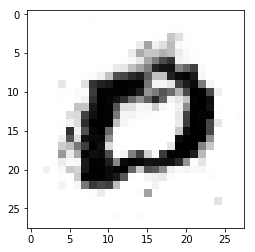

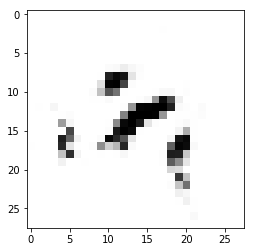

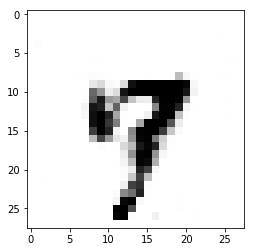

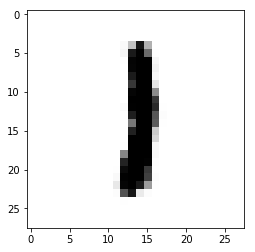

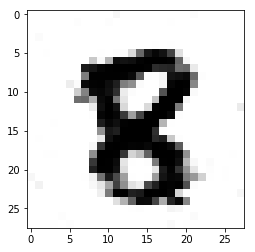

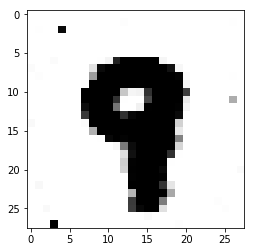

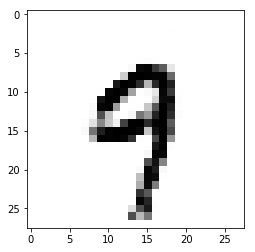

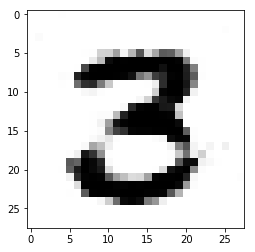

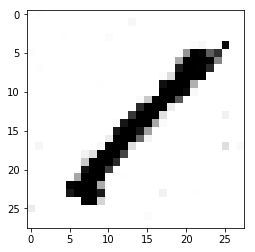

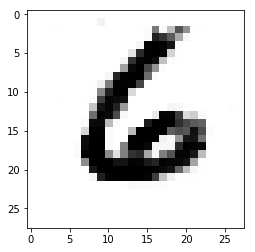

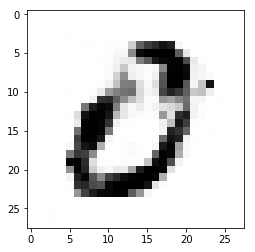

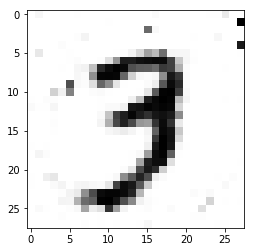

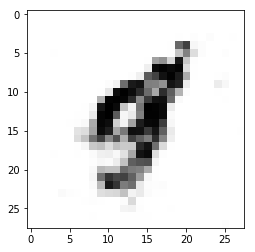

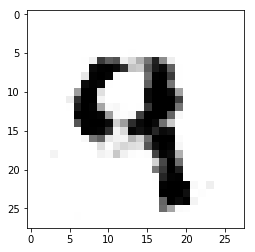

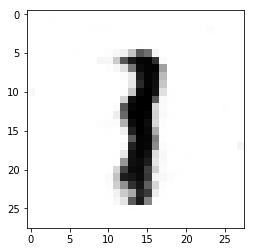

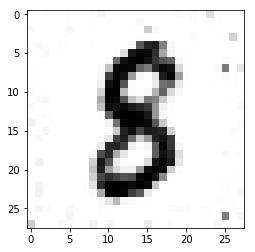

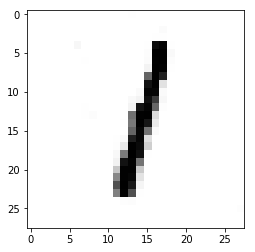

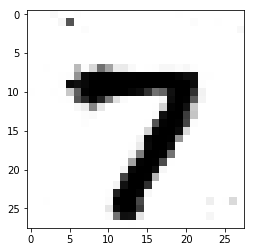

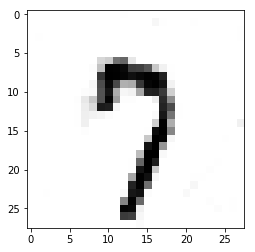

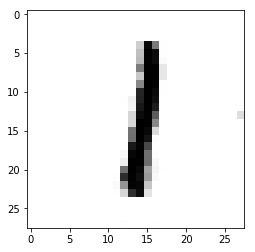

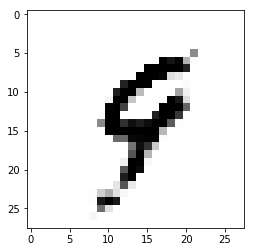

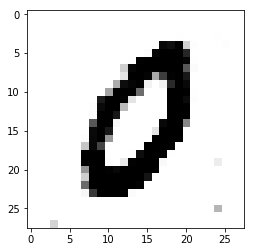

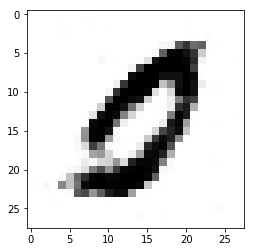

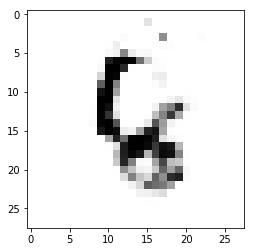

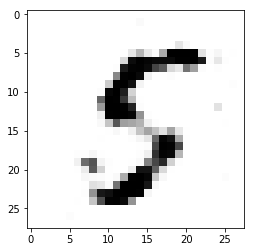

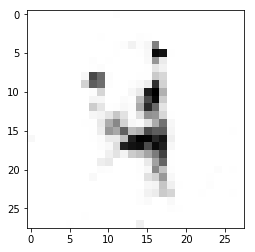

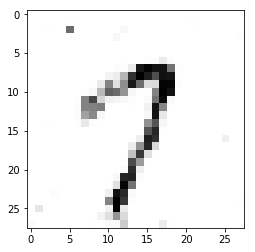

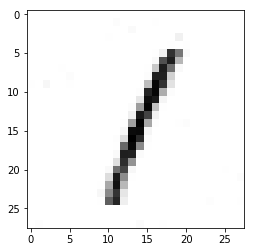

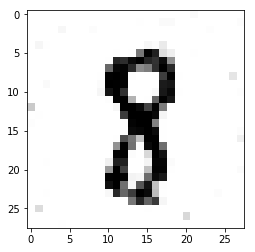

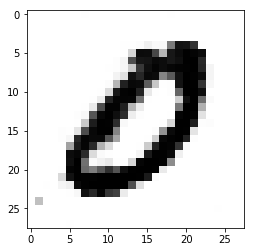

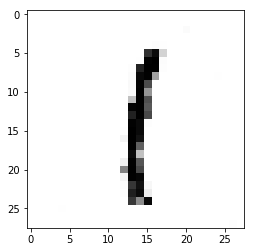

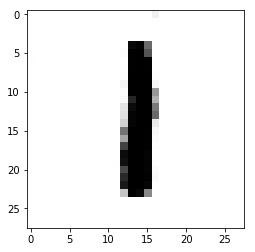

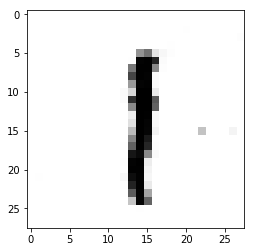

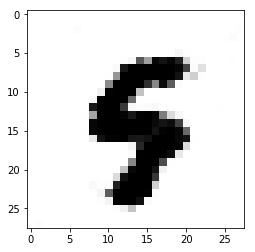

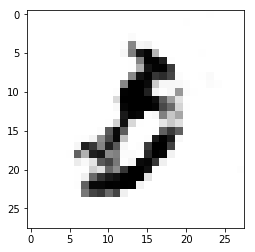

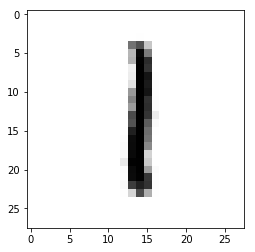

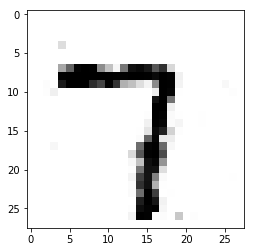

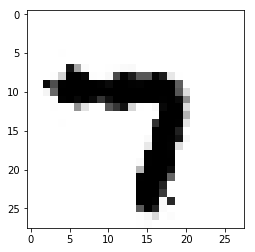

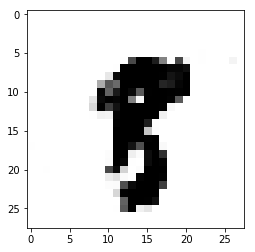

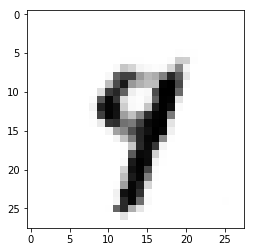

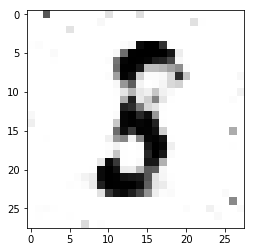

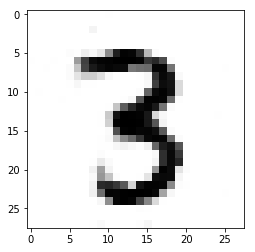

In [113]:
#plt.imshow(samples[99].reshape(28,28), cmap="Greys")
for i in range(500):
    fig = plt.figure()
    plt.imshow(samples[i].reshape(28,28), cmap="Greys")
    plt.savefig('/home/aayush/images/' + str(i) + '.png')